In [1]:
import json
import bz2
import regex
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
tqdm.pandas()
from scipy import sparse
import codecs
import random

In [2]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


c:\venv\nlp\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
responses = []
with bz2.BZ2File('banki_responses.json.bz2', 'r') as thefile:
    for row in tqdm(thefile):
        resp = json.loads(row)
        if not resp['rating_not_checked'] and (len(resp['text'].split()) > 0):
            responses.append(resp)

#  –î–æ–º–∞—à–Ω–µ–µ –∑–∞–¥–∞–Ω–∏–µ –ø–æ NLP # 1 [100 –±–∞–ª–ª–æ–≤]
## –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ 

–í —ç—Ç–æ–º –¥–æ–º–∞—à–Ω–µ–º –∑–∞–¥–∞–Ω–∏–∏ –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –ø–æ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç–∑—ã–≤—ã –Ω–∞ –±–∞–Ω–∫–∏ —Å —Å–∞–π—Ç–∞ banki.ru.

–î–∞–Ω–Ω—ã–µ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤, –Ω–µ–∫–æ—Ç–æ—Ä—É—é –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é, –∞ —Ç–∞–∫–∂–µ –æ—Ü–µ–Ω–∫—É –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. 

–¢–µ–∫—Å—Ç—ã —Ö—Ä–∞–Ω—è—Ç—Å—è –≤ json-–∞—Ö –≤ –º–∞—Å—Å–∏–≤–µ responses.

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–º–µ—Ä –æ—Ç–∑—ã–≤–∞:

In [4]:
responses[99]

{'city': '–≥. –°–∞—Ä–∞—Ç–æ–≤',
 'rating_not_checked': False,
 'title': '–ö–∞—Ä—Ç–∞ –∫–æ –≤–∫–ª–∞–¥—É',
 'num_comments': 0,
 'bank_license': '–ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 880',
 'author': 'ronnichka',
 'bank_name': '–Æ–≥—Ä–∞',
 'datetime': '2015-06-03 20:56:57',
 'text': '–ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! –•–æ—Ç–µ–ª–∞ –Ω–∞–ø–∏—Å–∞—Ç—å, —á—Ç–æ –º–Ω–µ –º–µ—Å—è—Ü –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É –∫–æ –≤–∫–ª–∞–¥—É, —Å—Å—ã–ª–∞—è—Å—å –Ω–∞ "–Ω–∞–º –∂–µ –∏—Ö –∏–∑ –°–∞–º–∞—Ä—ã –≤–µ–∑—É—Ç" (–Ω–∞ —Å–µ–∫—É–Ω–¥–æ—á–∫—É 5 —á–∞—Å–æ–≤ –µ–∑–¥—ã –æ—Ç –Ω–∞—à–µ–≥–æ –≥–æ—Ä–æ–¥–∞). –ù–æ! –ü—Ä–æ—á–∏—Ç–∞–ª–∞, —á—Ç–æ –ª—é–¥—è–º 3,5 –º–µ—Å—è—Ü–µ–≤ –Ω–µ –≤—ã–¥–∞—é—Ç –∫–∞—Ä—Ç—É, –∏ –ø–æ–Ω—è–ª–∞, —á—Ç–æ —É –º–µ–Ω—è –≤—Å–µ —Ö–æ—Ä–æ—à–æ, –ø–æ–∫–∞ —á—Ç–æ. –ò –ø–æ–¥–∞—Ä–æ–∫ –º–Ω–µ –¥–∞–ª–∏, –∏ –∫—É–ª–µ—Ä –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–∏ –µ—Å—Ç—å. –¢–∞–∫ —á—Ç–æ —è, –∫–æ–Ω–µ—á–Ω–æ, –≥–æ—Ç–æ–≤–∞ –∂–¥–∞—Ç—å. –ü—Ä–∞–≤–¥–∞ —Ö–æ—Ç–µ–ª–æ—Å—å –±—ã –Ω–µ –æ—á–µ–Ω—å –¥–æ–ª–≥–æ.',
 'rating_grade': 3}

## –ß–∞—Å—Ç—å 1. –ê–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

1. –ü–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ —Ä–∞–∑–Ω—ã—Ö –≥–æ—Ä–æ–¥–∞—Ö –∏ –Ω–∞ —Ä–∞–∑–Ω—ã–µ –±–∞–Ω–∫–∏
2. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º—ã –¥–ª–∏–Ω —Å–ª–æ–≤ –≤ —Å–∏–º–≤–æ–ª–∞—Ö –∏ –≤ —Å–ª–æ–≤–∞—Ö
3. –ù–∞–π–¥–∏—Ç–µ 10 —Å–∞–º—ã—Ö —á–∞—Å—Ç—ã—Ö:
    * —Å–ª–æ–≤
    * —Å–ª–æ–≤ –±–µ–∑ —Å—Ç–æ–ø-—Å–ª–æ–≤
    * –ª–µ–º–º 
* —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã—Ö
4. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –∫—Ä–∏–≤—ã–µ –¶–∏–ø—Ñ–∞ –∏ –•–∏–ø—Å–∞
5. –û—Ç–≤–µ—Ç—å—Ç–µ –Ω–∞ —Å–ª–µ–¥—É—é—â–∏–µ –≤–æ–ø—Ä–æ—Å—ã:
    * –∫–∞–∫–æ–µ —Å–ª–æ–≤–æ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –∏–ª–∏ "–∫–ª–∏–µ–Ω—Ç"?
    * —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"?
6. –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É $tf-idf$, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [5]:
# –ü–µ—Ä–µ–≥–æ–Ω—è–µ–º –æ—Ç–∑—ã–≤—ã –≤ dataframe
df = pd.DataFrame(responses)
df.head()

author     bank_license        bank_name            city  \
0       uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1       Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2   Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
3       643609  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å   
4  anfisa-2003  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766         –û–¢–ü –ë–∞–Ω–∫    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   
3  2015-06-05 13:51:01             2           NaN               False   
4  2015-06-05 10:58:12             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...   
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...   

                                               title  
0                                             –ñ–∞–ª–æ–±–∞  
1      –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  
2                    –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.  
3  –ú–µ–Ω—è—é—Ç –ø—Ä–æ—Ü–µ–Ω—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏  –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–≤ –∏ –Ω–µ ...  
4             –í–µ—Ä–Ω–∏—Ç–µ –¥–µ–Ω–µ–∂–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –∑–∞ —Å—Ç—Ä–∞—Ö–æ–≤–∫—É

–°—á–∏—Ç–∞–µ–º –æ—Ç–∑—ã–≤—ã –ø–æ –±–∞–Ω–∫–∞–º –∏ –≥–æ—Ä–æ–¥–∞–º

In [6]:
sorted(df.bank_name.unique())

['2–¢ –ë–∞–Ω–∫',
 '–ê–ë –§–∏–Ω–∞–Ω—Å',
 '–ê–ë–ë',
 '–ê–ú–ë –ë–∞–Ω–∫',
 '–ê–ú–¢ –ë–∞–Ω–∫',
 '–ê–§ –ë–∞–Ω–∫',
 '–ê–±—Å–æ–ª—é—Ç –ë–∞–Ω–∫',
 '–ê–≤–∞–Ω–≥–∞—Ä–¥',
 '–ê–≤–µ—Ä—Å',
 '–ê–≤—Ç–æ–≥—Ä–∞–¥–±–∞–Ω–∫',
 '–ê–≤—Ç–æ—Ç–æ—Ä–≥–±–∞–Ω–∫',
 '–ê–≥—Ä–æ–ø—Ä–æ–º–∫—Ä–µ–¥–∏—Ç',
 '–ê–≥—Ä–æ—Ä–æ—Å',
 '–ê–≥—Ä–æ—Å–æ—é–∑',
 '–ê–≥—Ä–æ—Ö–∏–º–±–∞–Ω–∫',
 '–ê–¥–∞–º–æ–Ω –ë–∞–Ω–∫',
 '–ê–¥–º–∏—Ä–∞–ª—Ç–µ–π—Å–∫–∏–π',
 '–ê–∑–∏–∞—Ç—Å–∫–æ-–¢–∏—Ö–æ–æ–∫–µ–∞–Ω—Å–∫–∏–π –ë–∞–Ω–∫',
 '–ê–π-–°–∏-–ê–π-–°–∏-–ê–π –ë–∞–Ω–∫ (ICICI)',
 '–ê–π–ú–∞–Ω–∏–ë–∞–Ω–∫',
 '–ê–π–≤–∏ –ë–∞–Ω–∫',
 '–ê–∫ –ë–∞—Ä—Å',
 '–ê–∫–∞–¥–µ–º–∏—á–µ—Å–∫–∏–π –†—É—Å—Å–∫–∏–π –ë–∞–Ω–∫',
 '–ê–∫–∏–±–∞–Ω–∫',
 '–ê–∫—Å–æ–Ω–±–∞–Ω–∫',
 '–ê–∫—Ç–∏–≤–ö–∞–ø–∏—Ç–∞–ª –ë–∞–Ω–∫',
 '–ê–∫—Ü–µ–Ω—Ç',
 '–ê–∫—Ü–µ–ø—Ç',
 '–ê–ª–¥–∞–Ω–∑–æ–ª–æ—Ç–æ–±–∞–Ω–∫',
 '–ê–ª–µ–∫—Å–∞–Ω–¥—Ä–æ–≤—Å–∫–∏–π',
 '–ê–ª–µ—Ñ-–ë–∞–Ω–∫',
 '–ê–ª–º–∞–∑—ç—Ä–≥–∏—ç–Ω–±–∞–Ω–∫',
 '–ê–ª—Ç—ã–Ω–±–∞–Ω–∫',
 '–ê–ª—å—Ç–∞-–ë–∞–Ω–∫',
 '–ê–ª—å—Ñ–∞-–ë–∞–Ω–∫',
 '–ê–Ω–µ–ª–∏–∫ –†–£',
 '–ê–Ω–∫–æ—Ä –ë–∞–Ω–∫',
 '–ê–Ω—Ç–∞–ª–±–∞–Ω–∫',
 '–ê—Ä–

–ù–∞–∑–≤–∞–Ω–∏—è –±–∞–Ω–∫–æ–≤ –±–æ–ª–µ–µ-–º–µ–Ω–µ–µ –Ω–æ—Ä–º–∞–ª—å–Ω—ã–µ, –Ω–æ –Ω–µ —É—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –ø–µ—Ä–µ–∏–º–µ–Ω–æ–≤—ã–≤–∞–Ω–∏—è –∏ —Å–ª–∏—è–Ω–∏—è-–ø–æ–≥–ª–æ—â–µ–Ω–∏—è (–∏ –µ—â–µ –≤–æ–ø—Ä–æ—Å –∫–∞–∫ –∏—Ö —É—á–∏—Ç—ã–≤–∞—Ç—å)

In [7]:
df.city.unique()

array(['–≥. –ú–æ—Å–∫–≤–∞', '–≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫', '–≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å', ...,
       '–≥. –ú–æ—Å–∫–≤–∞-–í–ª–∞–¥–∏–º–∏—Ä', '–≥. –°–ü–±.',
       '–≥. –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, —Å—Ç.–ü–∞–≤–ª–æ–≤—Å–∫–∞—è'], dtype=object)

–° –≥–æ—Ä–æ–¥–∞–º–∏ –≥–æ—Ä–∞–∑–¥–æ —Ö—É–∂–µ, –Ω–∞–¥–æ —á–∏—Å—Ç–∏—Ç—å. C –∫–ª–∞–¥—Ä–æ–º —Å–≤—è–∑—ã–≤–∞—Ç—å—Å—è –Ω–µ —Ö–æ—á–µ—Ç—Å—è, –ø–æ–ø—Ä–æ–±—É–µ–º –ø—Ä–æ–≥–Ω–∞—Ç—å —á–µ—Ä–µ–∑ –Ω–∞—Ç–∞—à—É

In [8]:
from natasha import LocationExtractor

In [9]:
def extract_city(text):
    if isinstance(text, str):
        extractor = LocationExtractor()
        matches = extractor(text)
        if len(matches) > 0:
            return matches[0].fact.name
        else:
            return None
    else:
        return None

In [10]:
cities = pd.DataFrame(df.city.unique(), columns=['orig_name'])
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 1 columns):
orig_name    5823 non-null object
dtypes: object(1)
memory usage: 45.6+ KB


In [11]:
cities['clean_name'] = cities['orig_name'].progress_apply(extract_city)

In [12]:
cities

orig_name          clean_name
0                                             –≥. –ú–æ—Å–∫–≤–∞              –º–æ—Å–∫–≤–∞
1                                        –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫         –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫
2                                         –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å          —Å—Ç–∞–≤—Ä–æ–ø–æ–ª—å
3                                          –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫           —á–µ–ª—è–±–∏–Ω—Å–∫
4                                          –≥. –í–æ–ª–≥–æ–≥—Ä–∞–¥           –≤–æ–ª–≥–æ–≥—Ä–∞–¥
5                                              –≥. –ü–µ—Ä–º—å               –ø–µ—Ä–º—å
6                                     –≥. –†–æ—Å—Ç–æ–≤-–Ω–∞-–î–æ–Ω—É              —Ä–æ—Å—Ç–æ–≤
7                                            –≥. –í–æ—Ä–æ–Ω–µ–∂             –≤–æ—Ä–æ–Ω–µ–∂
8                         –≥. –¢–∞–≥–∞–Ω—Ä–æ–≥ (–†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª.)            —Ç–∞–≥–∞–Ω—Ä–æ–≥
9                                    –≥. –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥           –ø–µ—Ç–µ—Ä–±—É—Ä–≥
10                                          –≥. –ö–æ–Ω–∞–∫–æ–≤–æ            –∫–æ–Ω–∞–∫–æ–≤–æ
11                                          –≥. –ú—É—Ä–º–∞–Ω—Å–∫            –º—É—Ä–º–∞–Ω—Å–∫
12                      –≥. –í–æ–ª–≥–æ–¥–æ–Ω—Å–∫ (–†–æ—Å—Ç–æ–≤—Å–∫–∞—è –æ–±–ª.)          –≤–æ–ª–≥–æ–¥–æ–Ω—Å–∫
13                                       –≥. –ë–æ–ª—å—à–µ—Ä–µ—á—å–µ         –±–æ–ª—å—à–µ—Ä–µ—á—å–µ
14                        –≥. –û–¥–∏–Ω—Ü–æ–≤–æ (–ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª.)            –æ–¥–∏–Ω—Ü–æ–≤–æ
15                 –≥. –°–∞–ª–∞–≤–∞—Ç (–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ë–∞—à–∫–æ—Ä—Ç–æ—Å—Ç–∞–Ω)             —Å–∞–ª–∞–≤–∞—Ç
16                                         –≥. –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä           –∫—Ä–∞—Å–Ω–æ–¥–∞—Ä
17                                          –≥. –ö–æ—Å—Ç—Ä–æ–º–∞            –∫–æ—Å—Ç—Ä–æ–º–∞
18                                   –≥. –ù–∏–∂–Ω–∏–π –ù–æ–≤–≥–æ—Ä–æ–¥     –Ω–∏–∂–Ω–∏–π –Ω–æ–≤–≥–æ—Ä–æ–¥
19                                              –≥. –û—Ä–µ–ª                –æ—Ä—ë–ª
20                                           –≥. –°–∞—Ä–∞—Ç–æ–≤             —Å–∞—Ä–∞—Ç–æ–≤
21                                            –≥. –ö–∞–∑–∞–Ω—å              –∫–∞–∑–∞–Ω—å
22                          –≥. –†–µ—É—Ç–æ–≤ (–ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª.)              —Ä–µ—É—Ç–æ–≤
23                                         –≥. –£–ª—å—è–Ω–æ–≤—Å–∫           —É–ª—å—è–Ω–æ–≤—Å–∫
24                                        –≥. –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫          –∫—Ä–∞—Å–Ω–æ—è—Ä—Å–∫
25                                         –≥. –•–∞–±–∞—Ä–æ–≤—Å–∫           —Ö–∞–±–∞—Ä–æ–≤—Å–∫
26                   –≥. –ú–∞–≥–Ω–∏—Ç–æ–≥–æ—Ä—Å–∫ (–ß–µ–ª—è–±–∏–Ω—Å–∫–∞—è –æ–±–ª.)        –º–∞–≥–Ω–∏—Ç–æ–≥–æ—Ä—Å–∫
27                      –≥. –§—Ä–æ–ª–æ–≤–æ (–í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª.)             —Ñ—Ä–æ–ª–æ–≤–æ
28                                      –≥. –ù–æ–≤–æ—á–µ—Ä–∫–∞—Å—Å–∫        –Ω–æ–≤–æ—á–µ—Ä–∫–∞—Å—Å–∫
29                                              –≥. –ß–∏—Ç–∞                —á–∏—Ç–∞
...                                                 ...                 ...
5794                 –≥. –ñ–µ–ª–µ–∑–Ω–æ–≥–æ—Ä—Å–∫, –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π        –∂–µ–ª–µ–∑–Ω–æ–≥–æ—Ä—Å–∫
5795                         –≥. –ö–µ–º–µ—Ä–æ–≤–æ / –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥            –∫–µ–º–µ—Ä–æ–≤–æ
5796                     –≥. –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π, –≥.–ê—á–∏–Ω—Å–∫   –∫—Ä–∞—Å–Ω–æ—è—Ä—Å–∫–∏–π –∫—Ä–∞–π
5797                              –≥. –°–∞—Ä–∞—Ç–æ–≤ –∏–ª–∏ –ú–æ—Å–∫–≤–∞             —Å–∞—Ä–∞—Ç–æ–≤
5798                           –≥. –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫ –≤–æ–µ–Ω–Ω–∞—è 9         –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫
5799  –≥. –°—Ç–∞—Ç—å—è 24. –ì–ª–∞–≤–∞ II. –ó–∞—â–∏—Ç–∞ –ø—Ä–∞–≤ –ø–æ—Ç—Ä–µ–±–∏—Ç–µ–ª...                None
5800                            –≥. –Ω–µ –ú–æ—Å–∫–≤–∞ –∏ –Ω–µ –ü–∏—Ç–µ—Ä              –º–æ—Å–∫–≤–∞
5801                   –≥. –ú–æ—Å–∫–≤–∞ –°—ã—Ä–æ–º—è—Ç–Ω–∏—á–µ—Å–∫–∏–π –ø—Ä-–¥,4              –º–æ—Å–∫–≤–∞
5802               –≥. –≥. –í–æ–ª–∂—Å–∫–∏–π –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫–æ–π –æ–±–ª–∞—Å—Ç–∏            –≤–æ–ª–∂—Å–∫–∏–π

In [13]:
cities.clean_name.count()

4773

In [14]:
cities.clean_name.value_counts()

–º–æ—Å–∫–≤–∞                359
–ø–µ—Ç–µ—Ä–±—É—Ä–≥             124
—Ä–æ—Å—Ç–æ–≤                 51
–º–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å     51
–º–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª         39
–∫—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π     27
—Ö–∏–º–∫–∏                  24
–º—ã—Ç–∏—â–∏                 23
–µ–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥           22
–∫—Ä–∞—Å–Ω–æ–¥–∞—Ä              22
—É—Ñ–∞                    22
–Ω–∏–∂–Ω–∏–π –Ω–æ–≤–≥–æ—Ä–æ–¥        22
–∫–∞–∑–∞–Ω—å                 21
–∫—Ä–∞—Å–Ω–æ–≥–æ—Ä—Å–∫            21
—Å–∞–º–∞—Ä                  21
–æ–º—Å–∫                   20
–∂–µ–ª–µ–∑–Ω–æ–≥–æ—Ä—Å–∫           20
–≤–æ–ª–≥–æ–≥—Ä–∞–¥              19
–ø–æ–¥–æ–ª—å—Å–∫               18
–Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫            18
—Å–∞—Ä–∞—Ç–æ–≤                18
–¥–∑–µ—Ä–∂–∏–Ω—Å–∫              18
–ø—É—à–∫–∏–Ω–æ                18
–ª—é–±–µ—Ä—Ü—ã                18
–æ–¥–∏–Ω—Ü–æ–≤–æ               17
—Ç–æ–ª—å—è—Ç—Ç–∏               17
—â–µ–ª–∫–æ–≤–æ                17
—á–µ–ª—è–±–∏–Ω—Å–∫              17
–∫–ª–∏–Ω                   

–ü–æ—Ç–µ—Ä—è–ª–∏ —Ç—ã—Å—è—á—É —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–∞–ø–∏—Å–µ–π, –Ω–∞ –≤—ã—Ö–æ–¥–µ –∫–∞—á–µ—Å—Ç–≤–æ —Ç–∞–∫ —Å–µ–±–µ - –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –æ–±–ª–∞—Å—Ç–∏, –æ–ø–µ—á–∞—Ç–∫–∏ –≤ –≥–æ—Ä–æ–¥–∞—Ö –∏ –º–∏—Ñ–∏—á–µ—Å–∫–∏–µ –≥–æ—Ä–æ–¥–∞. –ü–æ —Ö–æ—Ä–æ—à–µ–º—É –Ω–∞–¥–æ –∫–ª–∞–¥—Ä –ø—Ä–∏–∫—Ä—É—á–∏–≤–∞—Ç—å –∫ —Ñ–æ—Ä–º–µ –Ω–∞ —Å–∞–π—Ç–µ, –ø–æ—Å—Ç—Ñ–∞–∫—Ç—É–º —Ç–∞–∫–æ–µ —á–∏—Å—Ç–∏—Ç—å —Å —Ö–æ—Ä–æ—à–∏–º –∫–∞—á–µ—Å—Ç–≤–æ–º –º–æ–∂–Ω–æ —Ç–æ–ª—å–∫–æ —Ä—É–∫–∞–º–∏.

–ù–æ –ª—É—á—à–µ, —á–µ–º –Ω–∏—á–µ–≥–æ.

In [15]:
df['clean_city'] = df['city'].replace(cities['orig_name'].tolist(), cities['clean_name'].tolist())

In [16]:
df.head()

author     bank_license        bank_name            city  \
0       uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1       Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2   Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
3       643609  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å   
4  anfisa-2003  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766         –û–¢–ü –ë–∞–Ω–∫    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   
3  2015-06-05 13:51:01             2           NaN               False   
4  2015-06-05 10:58:12             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...   
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...   

                                               title   clean_city  
0                                             –ñ–∞–ª–æ–±–∞       –º–æ—Å–∫–≤–∞  
1      –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫  
2                    –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.       –º–æ—Å–∫–≤–∞  
3  –ú–µ–Ω—è—é—Ç –ø—Ä–æ—Ü–µ–Ω—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏  –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–≤ –∏ –Ω–µ ...   —Å—Ç–∞–≤—Ä–æ–ø–æ–ª—å  
4             –í–µ—Ä–Ω–∏—Ç–µ –¥–µ–Ω–µ–∂–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –∑–∞ —Å—Ç—Ä–∞—Ö–æ–≤–∫—É    —á–µ–ª—è–±–∏–Ω—Å–∫

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153499 entries, 0 to 153498
Data columns (total 11 columns):
author                153479 non-null object
bank_license          153498 non-null object
bank_name             153499 non-null object
city                  138325 non-null object
datetime              153499 non-null object
num_comments          153499 non-null int64
rating_grade          88658 non-null float64
rating_not_checked    153499 non-null bool
text                  153499 non-null object
title                 153499 non-null object
clean_city            135080 non-null object
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 11.9+ MB


In [18]:
df_clean_city = df.dropna(subset=['clean_city'])
df_clean_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 0 to 138946
Data columns (total 11 columns):
author                135079 non-null object
bank_license          135079 non-null object
bank_name             135080 non-null object
city                  135080 non-null object
datetime              135080 non-null object
num_comments          135080 non-null int64
rating_grade          73151 non-null float64
rating_not_checked    135080 non-null bool
text                  135080 non-null object
title                 135080 non-null object
clean_city            135080 non-null object
dtypes: bool(1), float64(1), int64(1), object(8)
memory usage: 11.5+ MB


In [19]:
df_cnt_by_bank_city = df_clean_city.groupby(["bank_name", "clean_city"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_cnt_by_bank_city

bank_name      clean_city  Count
8495                  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏          –º–æ—Å–∫–≤–∞   8435
665                        –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞   4006
7319                 –†—É—Å—Å–∫–∏–π –°—Ç–∞–Ω–¥–∞—Ä—Ç          –º–æ—Å–∫–≤–∞   2930
1818                           –í–¢–ë 24          –º–æ—Å–∫–≤–∞   2783
8618                  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏       –ø–µ—Ç–µ—Ä–±—É—Ä–≥   2627
4453        –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –ö—Ä–µ–¥–∏—Ç–Ω—ã–π –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞   2419
10308                   –¢–∏–Ω—å–∫–æ—Ñ—Ñ –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞   2403
11448                –•–æ—É–º –ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞   2216
4851        –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫ ¬´–¢—Ä–∞—Å—Ç¬ª          –º–æ—Å–∫–≤–∞   1721
6107                   –†–∞–π—Ñ—Ñ–∞–π–∑–µ–Ω–±–∞–Ω–∫          –º–æ—Å–∫–≤–∞   1475
9082                     –°–≤—è–∑–Ω–æ–π –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞   1468
1346                      –ë–∞–Ω–∫ –ú–æ—Å–∫–≤—ã          –º–æ—Å–∫–≤–∞   1332
6322                 –†–µ–Ω–µ—Å—Å–∞–Ω—Å –ö—Ä–µ–¥–∏—Ç          –º–æ—Å–∫–≤–∞   1274
11893                  –Æ–Ω–∏–ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞   1202
9553                         –°–∏—Ç–∏–±–∞–Ω–∫          –º–æ—Å–∫–≤–∞   1155
5920                    –ü—Ä–æ–º—Å–≤—è–∑—å–±–∞–Ω–∫          –º–æ—Å–∫–≤–∞   1117
153                          –ê–≤–∞–Ω–≥–∞—Ä–¥          –º–æ—Å–∫–≤–∞   1099
1881                           –í–¢–ë 24       –ø–µ—Ç–µ—Ä–±—É—Ä–≥   1001
722                        –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫       –ø–µ—Ç–µ—Ä–±—É—Ä–≥    925
11517                –•–æ—É–º –ö—Ä–µ–¥–∏—Ç –ë–∞–Ω–∫       –ø–µ—Ç–µ—Ä–±—É—Ä–≥    750
5262                         –û–¢–ü –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞    743
7384                 –†—É—Å—Å–∫–∏–π –°—Ç–∞–Ω–¥–∞—Ä—Ç       –ø–µ—Ç–µ—Ä–±—É—Ä–≥    719
3307                        –ö–∏–≤–∏ –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞    715
11095  –•–∞–Ω—Ç—ã-–ú–∞–Ω—Å–∏–π—Å–∫–∏–π –±–∞–Ω–∫ –û—Ç–∫—Ä—ã—Ç–∏–µ          –º–æ—Å–∫–≤–∞    646
4564        –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –û–±–ª–∞—Å—Ç–Ω–æ–π –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞    641
3544               –ö—Ä–µ–¥–∏—Ç –ï–≤—Ä–æ–ø–∞ –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞    625
4088                         –ú–¢–° –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞    612
10366                   –¢–∏–Ω—å–∫–æ—Ñ—Ñ –ë–∞–Ω–∫       –ø–µ—Ç–µ—Ä–±—É—Ä–≥    606
6575                          –†–æ—Å–±–∞–Ω–∫          –º–æ—Å–∫–≤–∞    592
1538                          –ë–∏–Ω–±–∞–Ω–∫          –º–æ—Å–∫–≤–∞    576
...                               ...             ...    ...
5498                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫         –¥–µ–¥–æ–≤—Å–∫      1
5450                         –û–¢–ü –ë–∞–Ω–∫        —â–µ—Ä–±–∏–Ω–∫–∞      1
5497                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫          –¥–∞–Ω–∫–æ–≤      1
5496                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫       –¥–∞–≤—ã–¥–æ–≤–æ–µ      1
5495                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫            –≥–¥–æ–≤      1
5494                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫  –≤—ã—à–Ω–∏–π –≤–æ–ª–æ—á–µ–∫      1
5492                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫      –≤–æ–ª–≥–æ–¥–æ–Ω—Å–∫      1
5489                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫          –≤–∏–¥–Ω–æ–µ      1
5488                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫        –±–æ–±—Ä—É–π—Å–∫      1
5487                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫         –±–∞—Ç–∞–π—Å–∫      1
5486                       –û–∫–µ–∞–Ω –ë–∞–Ω–∫          –∞–ø–∞—Ç–∏—Ç      1
5485                      –û–≥–Ω–∏ –ú–æ—Å–∫–≤—ã   —Å–æ–ª–Ω–µ—á–Ω–æ–≥–æ—Ä—Å–∫      1
5484                      –û–≥–Ω–∏ –ú–æ—Å–∫–≤—ã        –ø–æ–¥–æ–ª—å—Å–∫      1
5482                      –û–≥–Ω–∏ –ú–æ—Å–∫–≤—ã            –æ–º—Å–∫      1
5478                      –û–≥–Ω–∏ –ú–æ—Å–∫–≤—ã            –∫–ª–∏–Ω      1
5477                      –û–≥–Ω–∏ –ú–æ—Å–∫–≤—ã           –∏—Å—Ç—Ä–∞      1
5475                      –û–≥–Ω–∏ –ú–æ—Å–∫–≤—ã      –¥–æ–º–æ–¥–µ–¥–æ–≤–æ      1
5473      –û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π –†–µ–∑–µ—Ä–≤–Ω—ã–π –ë–∞–Ω–∫          –º–æ—Å–∫–≤–∞      1
5472   –û–±—ä–µ–¥–∏–Ω–µ–Ω–Ω—ã–π –ù–∞—Ü–∏–æ–Ω–∞–ª—å–Ω—ã–π –ë–∞–Ω–∫       —á–µ—Ä–µ–ø–æ–≤–µ—Ü

–†–µ–∑—É–ª—å—Ç–∞—Ç—ã –æ–∂–∏–¥–∞–µ–º—ã - –Ω–∞ –ø–µ—Ä–≤—ã—Ö –º–µ—Å—Ç–∞—Ö –∏–∑ –≥–æ—Ä–æ–¥–æ–≤ –ú–æ—Å–∫–≤–∞/–°–∞–Ω–∫-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –∞ –∏–∑ –±–∞–Ω–∫–æ–≤ - –°–±–µ—Ä–±–∞–Ω–∫, –ê–ª—å—Ñ–∞–±–∞–Ω–∫, –í–¢–ë –∏ —Ç.–¥.

In [20]:
del df_clean_city
del df_cnt_by_bank_city
del cities

import gc
gc.collect()

30294

–î–ª–∏–Ω–Ω–∞ —Ç–µ–∫—Å—Ç–∞ –≤ —Å–∏–º–≤–æ–ª–∞—Ö

In [21]:
df['text_len'] = df['text'].progress_apply(len)
df.sort_values(by="text_len", ascending=False)

author                          bank_license  \
49155          –î–µ–Ω22–¥–µ–Ω                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
118257   cybernatic-cat                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3292   
26023             ileon                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
38104            Knever                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
29058             ileon                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
86611          iSavaDev                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
130012        irinka312            –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2820 (–æ—Ç–æ–∑–≤–∞–Ω–∞)   
121564          Dartema                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2827   
77812           Origami                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1978   
93607   –ú–∞–∫—Å–∏–º –û—Ä–µ–Ω–±—É—Ä–≥                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3354   
31703      NatalyTheSun                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
131322      GeniusLoxly                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
49906             boris                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2275   
69840           bvo1204                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
75686       Maximillian                        –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 880   
109367        vonotsuda                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
147483      –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
81675              A-79                        –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 316   
70666            a19375                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
142764           Karneg                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
13622               fdh                        –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 429   
118560    andrey sychek                          –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1   
55786   Hazimir Fenring                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2289   
125038           lazy_m                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
115165        tatiana19                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
134039          Current                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
147478              vip                        –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 912   
121678          realabs                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1961   
149320   Konstantin_Lee                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
90158           stiv140                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2289   
...                 ...                                   ...   
151841          –ê–ª–µ–∫—Å–µ–π                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2110   
151191          –î–º–∏—Ç—Ä–∏–π                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2557   
27544        Stalevarov  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 625 (–æ—Ç–æ–∑–≤–∞–Ω–∞ 26.11.2014)   
152945        vasilich1                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1317   
132669          JIeruoH                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2673   
143065            Semir                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766   
151455             –í–∏–Ω—Å                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
152550        –°—Ç–∞–Ω–∏—Å–ª–∞–≤                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2879   
152410             –ü–µ—Ç—Ä                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
132753            dizzy                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
142182          YAM-YAM                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1317   
152274            Alive                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
150744              Nik                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2227   
153482              –¢–∏–º                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3292   
153274            –ü–∞–≤–µ–ª                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1637   
153353          –í–∏—Ç–∞–ª–∏–π                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
148794          Kosta-1            –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3392 (–æ—Ç–æ–∑–≤–∞–Ω–∞)   
2287             –∞–º–∏–∞–Ω—Ç                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
142070            tiona                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1470   
147201      Alekzanders                       –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3261   
152261           Sergey       

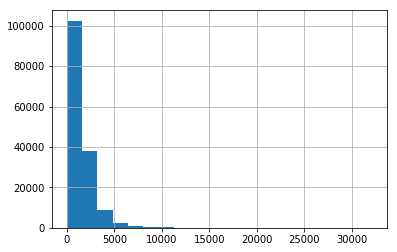

In [22]:
df['text_len'].hist(bins=20)

In [23]:
df['text_len'].describe()

count    153499.000000
mean       1554.212790
std        1319.098042
min          23.000000
25%         732.000000
50%        1193.000000
75%        1929.000000
max       32082.000000
Name: text_len, dtype: float64

–î–∞, —á–µ—Ä–µ–∑ —Ç–≤–∏—Ç—Ç–µ—Ä –æ—Ç–∑—ã–≤—ã –æ—Å—Ç–∞–≤–ª—è—Ç—å –±—ã–ª–æ –±—ã –Ω–µ –æ—á–µ–Ω—å —É–¥–æ–±–Ω–æ

–ß–µ—Å—Ç–Ω–æ –ø–æ–∑–∞–∏–º—Å—Ç–≤—É–µ–º –∫–æ–¥ –¥–ª—è –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ —Ç–µ–∫—Å—Ç–∞ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞

In [24]:
import re
regex = re.compile("[–∞-—è]+")

def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [25]:
df['text_words'] = df['text'].str.lower().progress_apply(words_only)
df.head()

author     bank_license        bank_name            city  \
0       uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1       Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2   Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
3       643609  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å   
4  anfisa-2003  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766         –û–¢–ü –ë–∞–Ω–∫    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   
3  2015-06-05 13:51:01             2           NaN               False   
4  2015-06-05 10:58:12             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...   
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...   

                                               title   clean_city  text_len  \
0                                             –ñ–∞–ª–æ–±–∞       –º–æ—Å–∫–≤–∞      1523   
1      –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫      1026   
2                    –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.       –º–æ—Å–∫–≤–∞       588   
3  –ú–µ–Ω—è—é—Ç –ø—Ä–æ—Ü–µ–Ω—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏  –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–≤ –∏ –Ω–µ ...   —Å—Ç–∞–≤—Ä–æ–ø–æ–ª—å       740   
4             –í–µ—Ä–Ω–∏—Ç–µ –¥–µ–Ω–µ–∂–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –∑–∞ —Å—Ç—Ä–∞—Ö–æ–≤–∫—É    —á–µ–ª—è–±–∏–Ω—Å–∫      1896   

                                          text_words  
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É...  
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...  
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç –≤ –¥–æ –º...  
3  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ —Å–±–µ—Ä–±–∞–Ω–∫...  
4  –≥ –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ –∑–∞—è–≤–ª–µ–Ω–Ω–∞—è –º–Ω–æ—é —Å...

In [26]:
df['words_count'] = df['text_words'].progress_apply(lambda x: len(x.split()))
df.sort_values(by="words_count", ascending=False)

author                        bank_license  \
49155          –î–µ–Ω22–¥–µ–Ω                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
118257   cybernatic-cat                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3292   
38104            Knever                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
86611          iSavaDev                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
26023             ileon                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
29058             ileon                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
121564          Dartema                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2827   
77812           Origami                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1978   
130012        irinka312          –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2820 (–æ—Ç–æ–∑–≤–∞–Ω–∞)   
131322      GeniusLoxly                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
93607   –ú–∞–∫—Å–∏–º –û—Ä–µ–Ω–±—É—Ä–≥                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3354   
31703      NatalyTheSun                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
49906             boris                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2275   
69840           bvo1204                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
147483      –Ω–µ–∏–∑–≤–µ—Å—Ç–Ω—ã–π                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
109367        vonotsuda                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
81675              A-79                      –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 316   
55786   Hazimir Fenring                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2289   
118560    andrey sychek                        –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1   
143973        Tatiana_K                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
142764           Karneg                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
125038           lazy_m                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
75686       Maximillian                      –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 880   
134039          Current                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
147478              vip                      –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 912   
59327             Ptetp                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2673   
90158           stiv140                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2289   
115165        tatiana19                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
13622               fdh                      –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 429   
42844          kuzma454                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
...                 ...                                 ...   
153274            –ü–∞–≤–µ–ª                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1637   
151455             –í–∏–Ω—Å                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1326   
153281          Nikolos                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
142182          YAM-YAM                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1317   
147201      Alekzanders                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3261   
148794          Kosta-1          –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3392 (–æ—Ç–æ–∑–≤–∞–Ω–∞)   
142070            tiona                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1470   
139690             0808  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3316 (–ª–∏–∫–≤. 05.12.2014)   
150744              Nik                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2227   
153304             –¢–û–®–ê  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 3316 (–ª–∏–∫–≤. 05.12.2014)   
153353          –í–∏—Ç–∞–ª–∏–π                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
152934          Molodez                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2879   
147019          –∫—É–∑–µ–Ω—ã—à                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2289   
127554             dodo                        –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1   
152760              jjj                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2557   
152274            Alive                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2748   
152410             –ü–µ—Ç—Ä                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
132753            dizzy                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
2287             –∞–º–∏–∞–Ω—Ç                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1623   
78660       azaliya2013                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481   
152261           Sergey                     –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2291   
151714          –í–∞—Å–∏–ª–∏–π          –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2575 (–æ—Ç–æ–∑–

–ò–Ω–æ–≥–¥–∞ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Ç—Ä–∞–Ω—Å–ª–∏—Ç - –Ω–∞–¥–æ –µ–≥–æ –∫–∞–∫-—Ç–æ —Ç–æ–∂–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å

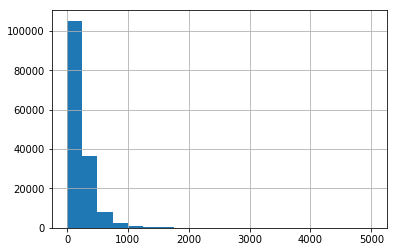

In [27]:
df['words_count'].hist(bins=20)

In [28]:
df['words_count'].describe()

count    153499.000000
mean        230.811751
std         196.607612
min           0.000000
25%         108.000000
50%         177.000000
75%         287.000000
max        5001.000000
Name: words_count, dtype: float64

–ò—Å—Å–ª–µ–¥—É–µ–º —Å–ª–æ–≤–∞ –¥–∞–ª—å—à–µ

In [29]:
from collections import Counter
cnt = Counter()
n_types = []
n_tokens = []
tokens = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens = row['text_words'].split()
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(list(cnt.values())))
for i in cnt.most_common(10):
    print(i)


('–≤', 1330550)
('–∏', 1058997)
('–Ω–µ', 855335)
('–Ω–∞', 707935)
('—á—Ç–æ', 640057)
('—è', 577500)
('—Å', 464037)
('–ø–æ', 372769)
('–º–Ω–µ', 320958)
('–±–∞–Ω–∫–∞', 275906)


### –ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞

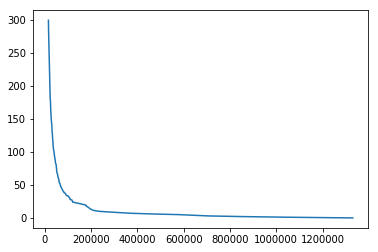

In [30]:
freqs = list(cnt.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### –ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞

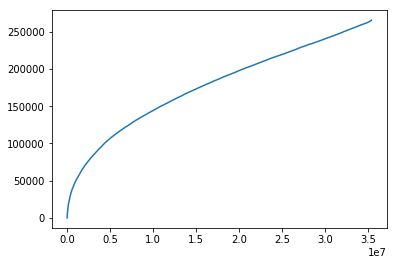

In [31]:
fig, ax = plt.subplots()
ax.plot(n_tokens, n_types)
plt.show()

–°–ª–æ–≤–∞—Ä—å —Å—Ç–æ–ø-—Å–ª–æ–≤ –Ω–µ –ø–æ–º–µ—à–∞–µ—Ç

In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')
mystopwords = stopwords.words('russian') + ['—ç—Ç–æ', '–Ω–∞—à' , '—Ç—ã—Å', '–º–ª–Ω', '–º–ª—Ä–¥', '—Ç–∞–∫–∂–µ',  '—Ç', '–¥']
def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vvoda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
df['text_words_stop'] = df['text_words'].progress_apply(remove_stopwords)

In [34]:
cnt_stop = Counter()
n_types_stop = []
n_tokens_stop = []
tokens_stop = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens_stop = row['text_words_stop'].split()
    cnt_stop.update(tokens_stop)
    n_types_stop.append(len(cnt_stop))
    n_tokens_stop.append(sum(list(cnt_stop.values())))
for i in cnt_stop.most_common(10):
    print(i)


('–±–∞–Ω–∫–∞', 275906)
('–±–∞–Ω–∫', 215426)
('–¥–µ–Ω—å–≥–∏', 131201)
('–∫–∞—Ä—Ç—É', 105829)
('–∫–∞—Ä—Ç—ã', 101821)
('–∫—Ä–µ–¥–∏—Ç', 81136)
('–¥–µ–Ω—å', 76552)
('–±–∞–Ω–∫–µ', 72169)
('–∑–∞—è–≤–ª–µ–Ω–∏–µ', 70423)
('–æ—á–µ–Ω—å', 66824)


### –ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞

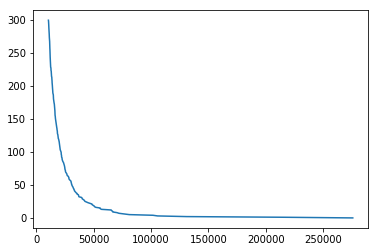

In [35]:
freqs = list(cnt_stop.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### –ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞

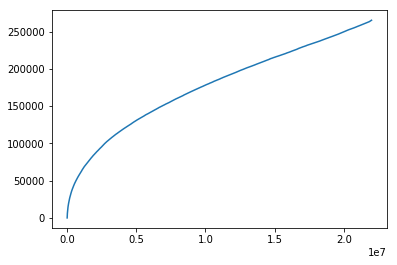

In [36]:
fig, ax = plt.subplots()
ax.plot(n_tokens_stop, n_types_stop)
plt.show()

–£–∂–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–µ–µ, –ø–æ—Å–º–æ—Ç—Ä–∏–º —á—Ç–æ —Ç–∞–º —Å –ª–µ–º–º–∞–º–∏

In [37]:
#from pymystem3 import Mystem
#m = Mystem()
#mystem –Ω—É –æ—á–µ–Ω—å —Ç–æ—Ä–º–æ–∑–∏—Ç - 48 —á–∞—Å–æ–≤, –ø–æ–ø—Ä–æ–±—É–µ–º —á–µ—Ä–µ–∑ –∫–æ–º–º–∞–Ω–¥–Ω—É—é —Å—Ç—Ä–æ–∫—É - 7 —á–∞—Å–æ–≤

#pymorphy2 —à—É—Å—Ç—Ä–µ–µ –≤—Å–µ—Ö –æ—Å—Ç–∞–ª—å–Ω—ã—Ö - 1 —á–∞—Å
from pymorphy2 import MorphAnalyzer
pm2 = MorphAnalyzer()

#RNNMorph - 10 —á–∞—Å–æ–≤
#from rnnmorph.predictor import RNNMorphPredictor
from nltk.tokenize import toktok
toktok = toktok.ToktokTokenizer()
#pred = RNNMorphPredictor(language="ru")


def lemmatize(text, morph=pm2):
    try:
        #return "".join(m.lemmatize(text)).strip()
        return ' '.join([morph.parse(word)[0].normal_form for word in text.split()])
        #tokens = tok.tokenize(text, return_str=True)
        #forms = predictor.predict(tokens.split())
        #return ' '.join([form.normal_form for form in forms])
    except:
        return " "

def mystem_analysis(text):
    try:
        in_file = uuid.uuid4().hex
        out_file = uuid.uuid4().hex
        with codecs.open(in_file, 'w', encoding='utf8') as f:
            f.write(text)

        !mystem -i --format json {in_file} {out_file}

        with codecs.open(out_file, 'r', encoding='utf8') as f:
            out = f.read()
            
        os.remove(in_file)
        os.remove(out_file)
        return out
    except:
        return " "

def pymorph_analysis(text):
    try:
        return [pm2.parse(word) for word in toktok.tokenize(text)]
    except:
        return []

In [38]:
mystoplemmas = ['–∫–æ—Ç–æ—Ä—ã–π','–ø—Ä–æ—à–ª—ã–π','—Å–µ–π', '—Å–≤–æ–π', '–Ω–∞—à', '–º–æ—á—å']
def remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return " "

In [39]:
def get_lemmas(arr):
    return ' '.join([lemma[0].normal_form for lemma in arr if not lemma[0].normal_form in mystoplemmas])

In [40]:
df['text_analysis'] = df['text_words_stop'].progress_apply(pymorph_analysis)

In [41]:
df['lemma'] = df['text_analysis'].progress_apply(get_lemmas)

In [42]:
df.head()

author     bank_license        bank_name            city  \
0       uhnov1  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
1       Foryou  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏  –≥. –ù–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫   
2   Vladimir84  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2562          –ë–∏–Ω–±–∞–Ω–∫       –≥. –ú–æ—Å–∫–≤–∞   
3       643609  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 1481  –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   –≥. –°—Ç–∞–≤—Ä–æ–ø–æ–ª—å   
4  anfisa-2003  –ª–∏—Ü–µ–Ω–∑–∏—è ‚Ññ 2766         –û–¢–ü –ë–∞–Ω–∫    –≥. –ß–µ–ª—è–±–∏–Ω—Å–∫   

              datetime  num_comments  rating_grade  rating_not_checked  \
0  2015-06-08 12:50:54             0           NaN               False   
1  2015-06-08 11:09:57             0           NaN               False   
2  2015-06-05 20:14:28             1           NaN               False   
3  2015-06-05 13:51:01             2           NaN               False   
4  2015-06-05 10:58:12             1           NaN               False   

                                                text  \
0  –î–æ–±—Ä—ã–π –¥–µ–Ω—å! –Ø –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä...   
1  –î–æ–±—Ä–æ–≥–æ –¥–Ω—è! –Ø–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä...   
2  –ó–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ! ¬†–î—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç 03.0...   
3  –î–æ–±—Ä—ã–π –¥–µ–Ω—å!! –Ø –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ –°–±–µ—Ä–ë–∞...   
4  04.03.2015 –≥. –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ, –∑–∞—è–≤...   

                                               title   clean_city  text_len  \
0                                             –ñ–∞–ª–æ–±–∞       –º–æ—Å–∫–≤–∞      1523   
1      –ù–µ –º–æ–≥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–æ–π –°–±–µ—Ä–±–∞–Ω–∫ –æ–Ω-–ª–∞–π–Ω  –Ω–æ–≤–æ—Å–∏–±–∏—Ä—Å–∫      1026   
2                    –î–≤–æ–π–Ω–æ–µ —Å–ø–∏—Å–∞–Ω–∏–µ –∑–∞ –æ–¥–∏–Ω —Ç–æ–≤–∞—Ä.       –º–æ—Å–∫–≤–∞       588   
3  –ú–µ–Ω—è—é—Ç –ø—Ä–æ—Ü–µ–Ω—Ç—ã –∫–æ–º–∏—Å—Å–∏–∏  –Ω–µ –ø—Ä–µ–¥—É–ø—Ä–µ–¥–∏–≤ –∏ –Ω–µ ...   —Å—Ç–∞–≤—Ä–æ–ø–æ–ª—å       740   
4             –í–µ—Ä–Ω–∏—Ç–µ –¥–µ–Ω–µ–∂–Ω—ã–µ —Å—Ä–µ–¥—Å—Ç–≤–∞ –∑–∞ —Å—Ç—Ä–∞—Ö–æ–≤–∫—É    —á–µ–ª—è–±–∏–Ω—Å–∫      1896   

                                          text_words  words_count  \
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –Ω–µ —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –∏ –ø–æ—Ä—É...          213   
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...          135   
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –æ—Ç –≤ –¥–æ –º...           83   
3  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç –≤ —Å–±–µ—Ä–±–∞–Ω–∫...          121   
4  –≥ –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤ –≤–∞—à–µ–º –±–∞–Ω–∫–µ –∑–∞—è–≤–ª–µ–Ω–Ω–∞—è –º–Ω–æ—é —Å...          291   

                                     text_words_stop  \
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—é—Å—å –∫–ª–∏–µ–Ω—Ç–æ–º –±–∞–Ω–∫–∞ –ø–æ—Ä—É—á–∏—Ç–µ–ª–µ–º...   
1  –¥–æ–±—Ä–æ–≥–æ –¥–Ω—è —è–≤–ª—è—é—Å—å –¥–µ—Ä–∂–∞—Ç–µ–ª–µ–º –∑–∞—Ä–ø–ª–∞—Ç–Ω–æ–π –∫–∞—Ä—Ç...   
2  –∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ –¥—É–±–ª–∏—Ä—É—é —Å–≤–æ–µ –∑–∞—è–≤–ª–µ–Ω–∏–µ –º–æ–∂–∞–π—Å–∫–∏–π...   
3  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å –æ—Ç–∫—Ä—ã–ª —Ä–∞—Å—á–µ—Ç–Ω—ã–π —Å—á–µ—Ç —Å–±–µ—Ä–±–∞–Ω–∫–µ —é—Ä...   
4  –≥ –≤–∑—è–ª–∞ –∫—Ä–µ–¥–∏—Ç –≤–∞—à–µ–º –±–∞–Ω–∫–µ –∑–∞—è–≤–ª–µ–Ω–Ω–∞—è –º–Ω–æ—é —Å—É–º...   

                                       text_analysis  \
0  [[(–¥–æ–±—Ä—ã–π, ADJF,Qual masc,sing,nomn, –¥–æ–±—Ä—ã–π, 0...   
1  [[(–¥–æ–±—Ä–æ–≥–æ, ADJF,Qual neut,sing,gent, –¥–æ–±—Ä—ã–π, ...   
2  [[(–∑–¥—Ä–∞–≤—Å—Ç–≤—É–π—Ç–µ, VERB,impf,intr plur,impr,excl...   
3  [[(–¥–æ–±—Ä—ã–π, ADJF,Qual masc,sing,nomn, –¥–æ–±—Ä—ã–π, 0...   
4  [[(–≥, NOUN,inan,masc,Fixd,Abbr sing,nomn, –≥–æ–¥,...   

                                               lemma  
0  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—Ç—å—Å—è –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞ –ø–æ—Ä—É—á–∏—Ç–µ–ª—å –∫...  
1  –¥–æ–±—Ä—ã–π –¥–µ–Ω—å —è–≤–ª—è—Ç—å—Å—è –¥–µ—Ä–∂–∞—Ç–µ–ª—å –∑–∞—Ä–ø–ª–∞—Ç–Ω—ã–π –∫–∞—Ä—Ç...  
2  –∑–¥—Ä–∞–≤—Å—Ç–≤–æ–≤–∞—Ç—å –¥—É–±–ª–∏—Ä–æ–≤–∞

In [43]:
cnt_lemmas = Counter()
n_types_lemmas = []
n_tokens_lemmas = []
tokens_lemmas = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens_lemmas = row['lemma'].split()
    cnt_lemmas.update(tokens_lemmas)
    n_types_lemmas.append(len(cnt_lemmas))
    n_tokens_lemmas.append(sum(list(cnt_lemmas.values())))
for i in cnt_lemmas.most_common(10):
    print(i)


('–±–∞–Ω–∫–∞', 399725)
('–∫–∞—Ä—Ç–∞', 334999)
('–±–∞–Ω–∫', 268864)
('–¥–µ–Ω—å–≥–∞', 179819)
('–¥–µ–Ω—å', 170152)
('–≥–æ–¥', 169247)
('–∫—Ä–µ–¥–∏—Ç', 156177)
('–º–æ–π', 156140)
('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 144050)
('–∫–ª–∏–µ–Ω—Ç', 136893)


–õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è –ø—Ä–æ–∏–∑–æ—à–ª–∞ –Ω–µ —Å–æ–≤—Å–µ–º –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ (–±–∞–Ω–∫–∞ –∏ –±–∞–Ω–∫), –Ω–æ –∂–¥–∞—Ç—å 7+ —á–∞—Å–æ–≤ –Ω–µ —Ö–æ—á–µ—Ç—Å—è

### –ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞

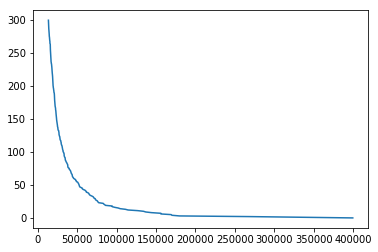

In [44]:
freqs = list(cnt_lemmas.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### –ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞

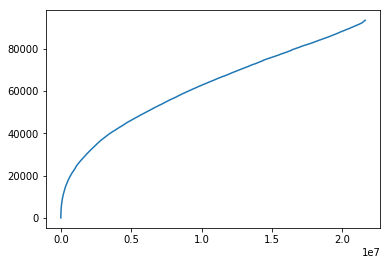

In [45]:
fig, ax = plt.subplots()
ax.plot(n_tokens_lemmas, n_types_lemmas)
plt.show()

In [46]:
cnt_noun = Counter()
n_types_noun = []
n_tokens_noun = []
tokens_noun = []
for index, row in tqdm(df.iterrows(), total = len(df)):
    tokens_noun = [lemma[0].normal_form for lemma in row['text_analysis'] if 'NOUN' in lemma[0].tag]
    cnt_noun.update(tokens_noun)
    n_types_noun.append(len(cnt_noun))
    n_tokens_noun.append(sum(list(cnt_noun.values())))
for i in cnt_noun.most_common(10):
    print(i)


('–±–∞–Ω–∫–∞', 399725)
('–∫–∞—Ä—Ç–∞', 334999)
('–±–∞–Ω–∫', 268864)
('–¥–µ–Ω—å–≥–∞', 179819)
('–¥–µ–Ω—å', 170152)
('–≥–æ–¥', 169247)
('–∫—Ä–µ–¥–∏—Ç', 156177)
('–æ—Ç–¥–µ–ª–µ–Ω–∏–µ', 144050)
('–∫–ª–∏–µ–Ω—Ç', 136893)
('—Å–æ—Ç—Ä—É–¥–Ω–∏–∫', 134168)


9 –∏–∑ 10 —á–∞—Å—Ç–æ—É–ø–æ—Ç—Ä–µ–±–ª—è–µ–º–º—ã—Ö –ª–µ–º–º - —Å—É—â–µ—Å—Ç–≤–∏—Ç–µ–ª—å–Ω—ã–µ

### –ö—Ä–∏–≤–∞—è –¶–∏–ø—Ñ–∞

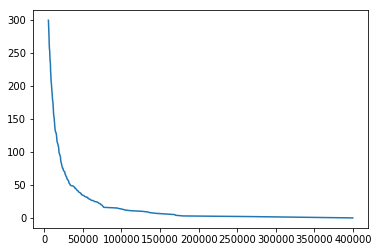

In [47]:
freqs = list(cnt_noun.values())
freqs = sorted(freqs, reverse = True)

fig, ax = plt.subplots()
ax.plot(freqs[:300], range(300))
plt.show()

### –ö—Ä–∏–≤–∞—è –•–∏–ø—Å–∞

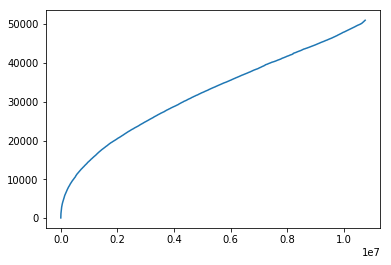

In [48]:
fig, ax = plt.subplots()
ax.plot(n_tokens_noun, n_types_noun)
plt.show()

In [49]:
print(f"—Å–ª–æ–≤–æ \"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫']} —Ä–∞–∑")
print(f"—Å–ª–æ–≤–æ \"–∫–ª–∏–µ–Ω—Ç\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt['–∫–ª–∏–µ–Ω—Ç']} —Ä–∞–∑")
if cnt['–∫–ª–∏–µ–Ω—Ç'] > cnt['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫']:
      print("—Å–ª–æ–≤–æ \"–∫–ª–∏–µ–Ω—Ç\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ \"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫\"")
else:
      print("—Å–ª–æ–≤–æ \"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ \"–∫–ª–∏–µ–Ω—Ç\"")

—Å–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 31189 —Ä–∞–∑
—Å–ª–æ–≤–æ "–∫–ª–∏–µ–Ω—Ç" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 20160 —Ä–∞–∑
—Å–ª–æ–≤–æ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ "–∫–ª–∏–µ–Ω—Ç"


In [50]:
#—Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —Å–ª–æ–≤–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –∏ "–¥–æ–≤–µ—Ä–∏–µ"
print(f"—Å–ª–æ–≤–æ \"–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ']} —Ä–∞–∑")
print(f"—Å–ª–æ–≤–æ \"–¥–æ–≤–µ—Ä–∏–µ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt['–¥–æ–≤–µ—Ä–∏–µ']} —Ä–∞–∑")
if cnt['–¥–æ–≤–µ—Ä–∏–µ'] > cnt['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ']:
      print("—Å–ª–æ–≤–æ \"–¥–æ–≤–µ—Ä–∏–µ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ \"–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ\"")
else:
      print("—Å–ª–æ–≤–æ \"–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ \"–¥–æ–≤–µ—Ä–∏–µ\"")

—Å–ª–æ–≤–æ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 1106 —Ä–∞–∑
—Å–ª–æ–≤–æ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 1156 —Ä–∞–∑
—Å–ª–æ–≤–æ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º —Å–ª–æ–≤–æ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ"


–ü–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥—Å—á–∏—Ç–∞—Ç—å —Ç–æ–∂–µ —Å–∞–º–æ–µ –ø–æ –ª–µ–º–º–∞–º

In [51]:
print(f"–ª–µ–º–º–∞ \"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt_lemmas['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫']} —Ä–∞–∑")
print(f"–ª–µ–º–º–∞ \"–∫–ª–∏–µ–Ω—Ç\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt_lemmas['–∫–ª–∏–µ–Ω—Ç']} —Ä–∞–∑")
if cnt_lemmas['–∫–ª–∏–µ–Ω—Ç'] > cnt_lemmas['—Å–æ—Ç—Ä—É–¥–Ω–∏–∫']:
      print("–ª–µ–º–º–∞ \"–∫–ª–∏–µ–Ω—Ç\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º –ª–µ–º–º–∞ \"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫\"")
else:
      print("–ª–µ–º–º–∞ \"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º –ª–µ–º–º–∞ \"–∫–ª–∏–µ–Ω—Ç\"")

–ª–µ–º–º–∞ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 134168 —Ä–∞–∑
–ª–µ–º–º–∞ "–∫–ª–∏–µ–Ω—Ç" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 136893 —Ä–∞–∑
–ª–µ–º–º–∞ "–∫–ª–∏–µ–Ω—Ç" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º –ª–µ–º–º–∞ "—Å–æ—Ç—Ä—É–¥–Ω–∏–∫"


In [52]:
print(f"–ª–µ–º–º–∞ \"–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt_lemmas['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ']} —Ä–∞–∑")
print(f"–ª–µ–º–º–∞ \"–¥–æ–≤–µ—Ä–∏–µ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è {cnt_lemmas['–¥–æ–≤–µ—Ä–∏–µ']} —Ä–∞–∑")
if cnt_lemmas['–¥–æ–≤–µ—Ä–∏–µ'] > cnt_lemmas['–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ']:
      print("–ª–µ–º–º–∞ \"–¥–æ–≤–µ—Ä–∏–µ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º –ª–µ–º–º–∞ \"–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ\"")
else:
      print("–ª–µ–º–º–∞ \"–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ\" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º –ª–µ–º–º–∞ \"–¥–æ–≤–µ—Ä–∏–µ\"")

–ª–µ–º–º–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 3244 —Ä–∞–∑
–ª–µ–º–º–∞ "–¥–æ–≤–µ—Ä–∏–µ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è 2108 —Ä–∞–∑
–ª–µ–º–º–∞ "–º–æ—à–µ–Ω–Ω–∏—á–µ—Å—Ç–≤–æ" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è —á–∞—â–µ, —á–µ–º –ª–µ–º–º–∞ "–¥–æ–≤–µ—Ä–∏–µ"


–õ—é–±–æ–ø—ã—Ç–Ω–æ, –Ω–æ —Å –ª–µ–º–º–∞–º–∏ —Å–∏—Ç—É–∞—Ü–∏—è –æ–±—Ä–∞—Ç–Ω–∞—è

#### –í –ø–æ–ª–µ "rating_grade" –∑–∞–ø–∏—Å–∞–Ω–∞ –æ—Ü–µ–Ω–∫–∞ –æ—Ç–∑—ã–≤–∞ –ø–æ —à–∫–∞–ª–µ –æ—Ç 1 –¥–æ 5. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –º–µ—Ä—É ùë°ùëì‚àíùëñùëëùëì, –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –Ω–∞–π—Ç–∏ –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞ –∏ –±–∏–≥—Ä–∞–º—ã –¥–ª—è –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 5) –∏ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤ (—Å –æ—Ü–µ–Ω–∫–æ–π 1)

In [53]:
df['rating_grade'].fillna(0, inplace=True)
df['rating_grade'].unique()

array([0., 2., 1., 5., 3., 4.])

In [54]:
tokens_by_rating = []
for rating in range(6):
    print(rating)
    tokens = []
    sample = df[df['rating_grade']==rating]['lemma']

    for i in range(len(sample)):
        tokens += sample.iloc[i].split()
    tokens_by_rating.append(tokens)

0
1
2
3
4
5


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [56]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_rating])
feature_names = tfidf.get_feature_names() 
tfidf_ranking1_uni = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking1_uni.append(phrase)

### –£–Ω–∏–≥—Ä–∞–º–º—ã –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

In [57]:
rankings = pd.DataFrame({'negtive_uni': tfidf_ranking1_uni})
rankings.head(10)

negtive_uni
0       –±–∞–Ω–∫–∞
1       –∫–∞—Ä—Ç–∞
2        –±–∞–Ω–∫
3      –¥–µ–Ω—å–≥–∞
4        –¥–µ–Ω—å
5         –≥–æ–¥
6   –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
7         –º–æ–π
8      –∫—Ä–µ–¥–∏—Ç
9   —Å–æ—Ç—Ä—É–¥–Ω–∏–∫

In [58]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_rating])
feature_names = tfidf.get_feature_names() 
tfidf_ranking1_bi = []
dense = tfidf_matrix.todense()

text = dense[1].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking1_bi.append(phrase)

### –ë–∏–≥—Ä–∞–º–º—ã –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

In [59]:
rankings = pd.DataFrame({'negative_bi': tfidf_ranking1_bi})
rankings.head(10)

negative_bi
0     —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞
1     –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞
2     –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞
3   –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å—Ç–≤–æ
4  –Ω–∞–ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ
5       –≥–æ—Ä—è—á–∏–π –ª–∏–Ω–∏—è
6        —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å
7          –∫–æ–ª–ª —Ü–µ–Ω—Ç—Ä
8      —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å
9        –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞

In [60]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_rating])
feature_names = tfidf.get_feature_names() 
tfidf_ranking5_uni = []
dense = tfidf_matrix.todense()

text = dense[5].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking5_uni.append(phrase)

### –£–Ω–∏–≥—Ä–∞–º–º—ã –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

In [61]:
rankings = pd.DataFrame({'positive_uni': tfidf_ranking5_uni})
rankings.head(10)

positive_uni
0        –±–∞–Ω–∫–∞
1         –±–∞–Ω–∫
2        –∫–∞—Ä—Ç–∞
3        –æ—á–µ–Ω—å
4          –≥–æ–¥
5       –∫—Ä–µ–¥–∏—Ç
6         –¥–µ–Ω—å
7       –∫–ª–∏–µ–Ω—Ç
8    –æ—Ç–¥–µ–ª–µ–Ω–∏–µ
9    —Å–æ—Ç—Ä—É–¥–Ω–∏–∫

In [62]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df = 0)
tfidf_matrix =  tfidf.fit_transform([' '.join(tokens) for tokens in tokens_by_rating])
feature_names = tfidf.get_feature_names() 
tfidf_ranking5_bi = []
dense = tfidf_matrix.todense()

text = dense[5].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(text)), text) if pair[1] > 0]
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
phrases = []
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:40]:
    tfidf_ranking5_bi.append(phrase)

### –ë–∏–≥—Ä–∞–º–º—ã –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –æ—Ç–∑—ã–≤–æ–≤

In [63]:
rankings = pd.DataFrame({'positive_bi': tfidf_ranking5_bi})
rankings.head(10)

positive_bi
0  –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞
1  —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞
2    –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫
3     –¥—Ä—É–≥–æ–π –±–∞–Ω–∫–∞
4     –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞
5   —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å
6  —è–≤–ª—è—Ç—å—Å—è –∫–ª–∏–µ–Ω—Ç
7  –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞
8  –¥–µ–±–µ—Ç–æ–≤—ã–π –∫–∞—Ä—Ç–∞
9      –¥–æ–±—Ä—ã–π –¥–µ–Ω—å

### –°–≤–æ–¥–Ω–∞—è —Ç–∞–±–ª–∏—Ü–∞

In [64]:
rankings = pd.DataFrame({'negtive_uni': tfidf_ranking1_uni, 'negative_bi': tfidf_ranking1_bi, 'positive_uni': tfidf_ranking5_uni, 'positive_bi': tfidf_ranking5_bi})
rankings.head(10)

negtive_uni         negative_bi positive_uni      positive_bi
0       –±–∞–Ω–∫–∞     —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞        –±–∞–Ω–∫–∞  –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞
1       –∫–∞—Ä—Ç–∞     –∫—Ä–µ–¥–∏—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞         –±–∞–Ω–∫  —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –±–∞–Ω–∫–∞
2        –±–∞–Ω–∫     –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞        –∫–∞—Ä—Ç–∞    –∏–Ω—Ç–µ—Ä–Ω–µ—Ç –±–∞–Ω–∫
3      –¥–µ–Ω—å–≥–∞   –¥–µ–Ω–µ–∂–Ω—ã–π —Å—Ä–µ–¥—Å—Ç–≤–æ        –æ—á–µ–Ω—å     –¥—Ä—É–≥–æ–π –±–∞–Ω–∫–∞
4        –¥–µ–Ω—å  –Ω–∞–ø–∏—Å–∞—Ç—å –∑–∞—è–≤–ª–µ–Ω–∏–µ          –≥–æ–¥     –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞
5         –≥–æ–¥       –≥–æ—Ä—è—á–∏–π –ª–∏–Ω–∏—è       –∫—Ä–µ–¥–∏—Ç   —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å
6   –æ—Ç–¥–µ–ª–µ–Ω–∏–µ        —Ä–∞–±–æ—á–∏–π –¥–µ–Ω—å         –¥–µ–Ω—å  —è–≤–ª—è—Ç—å—Å—è –∫–ª–∏–µ–Ω—Ç
7         –º–æ–π          –∫–æ–ª–ª —Ü–µ–Ω—Ç—Ä       –∫–ª–∏–µ–Ω—Ç  –æ—Ç–¥–µ–ª–µ–Ω–∏–µ –±–∞–Ω–∫–∞
8      –∫—Ä–µ–¥–∏—Ç      —Å–ª–µ–¥—É—é—â–∏–π –¥–µ–Ω—å    –æ—Ç–¥–µ–ª–µ–Ω–∏–µ  –¥–µ–±–µ—Ç–æ–≤—ã–π –∫–∞—Ä—Ç–∞
9   —Å–æ—Ç—Ä—É–¥–Ω–∏–∫        –∫–ª–∏–µ–Ω—Ç –±–∞–Ω–∫–∞    —Å–æ—Ç—Ä—É–¥–Ω–∏–∫      –¥–æ–±—Ä—ã–π –¥–µ–Ω—å

c:\venv\nlp\lib\site-packages\scipy\stats\stats.py:248: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


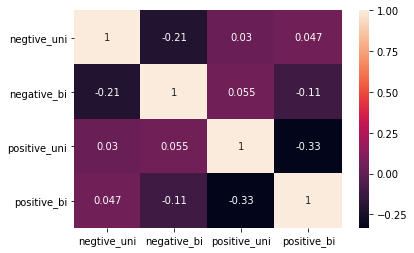

In [65]:
from scipy.stats import spearmanr
import seaborn as sns
%matplotlib inline
corr = spearmanr(rankings).correlation
sns.heatmap(corr, annot=True, xticklabels = list(rankings), yticklabels = list(rankings))

## –ß–∞—Å—Ç—å 2. –¢–µ–º–∞—Ç–∏—á–µ—Å–∫–æ–µ –º–æ–¥–µ–ª–∏—Ä–æ–≤–∞–Ω–∏–µ [20/100]

1. –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏—Ö –º–æ–¥–µ–ª–µ–π –∫–æ–ª–ª–µ–∫—Ü–∏–∏ –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ —Å —Ä–∞–∑–Ω—ã–º —á–∏—Å–ª–æ–º —Ç–µ–º. –ü—Ä–∏–≤–µ–¥–∏—Ç–µ –ø—Ä–∏–º–µ—Ä—ã –ø–æ–Ω—è—Ç–Ω—ã—Ö (–∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É–µ–º—ã—Ö) —Ç–µ–º.
2. –ù–∞–π–¥–∏—Ç–µ —Ç–µ–º—ã, –≤ –∫–æ—Ç–æ—Ä—ã—Ö —É–ø–æ–º—è–Ω—É—Ç—ã –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–µ –±–∞–Ω–∫–∏ (–°–±–µ—Ä–±–∞–Ω–∫, –í–¢–ë, –¥—Ä—É–≥–æ–π –±–∞–Ω–∫). –ú–æ–∂–µ—Ç–µ –ª–∏ –≤—ã –∏—Ö –ø—Ä–æ–∫–æ–º–º–µ–Ω—Ç–∏—Ä–æ–≤–∞—Ç—å / –æ–±—ä—è—Å–Ω–∏—Ç—å?

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º gensim. 

In [66]:
import gensim.corpora as corpora
from gensim.models import ldamodel

In [67]:
texts = [df['lemma'].iloc[i].split() for i in range(len(df))]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [96]:
random.seed(42)

–ö–∞–∫ –≤—ã—è—Å–Ω–∏–ª–æ—Å—å, —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ —Ç–µ–º—ã –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ì–ü–°–ß

In [97]:
%%time
lda = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, alpha='auto', eta='auto', iterations = 20, passes = 5)

Wall time: 12min 49s


In [98]:
lda.show_topics(20)

[(0,
  '0.181*"–∫—Ä–µ–¥–∏—Ç" + 0.037*"–±–∞–Ω–∫–∞" + 0.033*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.032*"–±–∞–Ω–∫" + 0.032*"–≥–æ–¥" + 0.021*"–±—Ä–∞—Ç—å" + 0.021*"–≤–∑—è—Ç—å" + 0.016*"–ø–æ–≥–∞—Å–∏—Ç—å" + 0.015*"–º–µ—Å—è—Ü" + 0.014*"–ø–ª–∞—Ç–∏—Ç—å"'),
 (1,
  '0.040*"–¥–µ–Ω—å" + 0.031*"—Å–∫–∞–∑–∞—Ç—å" + 0.028*"–ø–æ–∑–≤–æ–Ω–∏—Ç—å" + 0.023*"–∑–≤–æ–Ω–∏—Ç—å" + 0.016*"–±–∞–Ω–∫" + 0.016*"–Ω–µ–¥–µ–ª—è" + 0.013*"–±–∞–Ω–∫–∞" + 0.013*"—Ç–µ–ª–µ—Ñ–æ–Ω" + 0.012*"–∂–¥–∞—Ç—å" + 0.011*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ"'),
 (2,
  '0.109*"–¥–µ–Ω—å–≥–∞" + 0.102*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.020*"—Å–Ω—è—Ç—å" + 0.016*"—Ä—É–±–ª—å" + 0.015*"—Å—É–º–º–∞" + 0.015*"—Å—á—ë—Ç" + 0.015*"–¥–µ–Ω—å" + 0.013*"–∫—É–ø—é—Ä–∞" + 0.013*"–≤–µ—Ä–Ω—É—Ç—å" + 0.012*"—á–µ–∫"'),
 (3,
  '0.030*"–±–∞–Ω–∫" + 0.024*"—Ä—Ñ" + 0.021*"—Å—É–¥" + 0.020*"–ø—Ä–∞–≤–æ" + 0.016*"–∑–∞–∫–æ–Ω" + 0.011*"—Ä—É—Å—Å–∫–∏–π" + 0.011*"—Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ" + 0.011*"—Å—Ç–∞–Ω–¥–∞—Ä—Ç" + 0.009*"–º–æ–π" + 0.009*"–ª–∏—Ü–æ"'),
 (4,
  '0.079*"—Å—á—ë—Ç" + 0.069*"—Å—Ä–µ–¥—Å—Ç–≤–æ" + 0.057*"–ø–µ—Ä–µ–≤–æ–¥"

0. –ö—Ä–µ–¥–∏—Ç–Ω—ã–π –¥–æ–≥–æ–≤–æ—Ä
1. –¢–µ–ª–µ—Ñ–æ–Ω–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞
2. –ë–∞–Ω–∫–æ–º–∞—Ç—ã
3. –¢—è–∂–±—ã —Å –†—É—Å—Å–∫–∏–º –°—Ç–∞–Ω–¥–∞—Ä—Ç–æ–º
4. –î–µ–Ω–µ–∂–Ω—ã–µ –ø–µ—Ä–µ–≤–æ–¥—ã –∏ –∫–æ–º–∏—Å—Å–∏–∏
5. –¢–µ–ª–µ—Ñ–æ–Ω–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞ –ê–ª—å—Ñ–∞-–±–∞–Ω–∫–∞
6. –†–∞–±–æ—Ç–∞ –æ—Ç–¥–µ–ª–µ–Ω–∏–π
7. –ó–∞—è–≤–ª–µ–Ω–∏—è –Ω–∞ –ø–æ–ª—É—á–µ–Ω–∏–µ –∫–∞—Ä—Ç–æ—á–µ–∫
8. –í–∞–ª—é—Ç–Ω—ã–µ –≤–∫–ª–∞–¥—ã –∏ –¥–µ–ø–æ–∑–∏—Ç—ã
9. –†–∞–±–æ—Ç–∞ –±–∞–Ω–∫–∞ —Å –ø—Ä–∏—Ç–µ–Ω–∑–∏—è–º–∏
10. –û—Ç–∫—Ä—ã—Ç–∏–µ —Å—á–µ—Ç–∞ –≤ –í–¢–ë
11. –ò–ø–æ—Ç–µ–∫–∞
12. –ò–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∏–Ω–≥ –°–∏—Ç–∏–±–∞–Ω–∫–∞
13. –í–∫–ª–∞–¥—ã?
14. –°—Ç—Ä–∞—Ö–æ–≤–∞–Ω–∏–µ
15. (—Å—Ç—Ä–∞–Ω–Ω—ã–π –Ω–∞–±–æ—Ä)
16. 
17. –û–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤
18. –ü–æ–¥–¥–µ—Ä–∂–∫–∞ –°–±–µ—Ä–±–∞–Ω–∫–∞
19. –ü—Ä–æ—Å—Ä–æ—á–µ–Ω–Ω—ã–µ –∫—Ä–µ–¥–∏—Ç—ã

In [99]:
%%time
lda15 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=15, alpha='auto', eta='auto', iterations = 20, passes = 5)

Wall time: 11min 56s


In [100]:
lda15.show_topics(15)

[(0,
  '0.061*"–∫—Ä–µ–¥–∏—Ç" + 0.041*"–ø–ª–∞—Ç—ë–∂" + 0.032*"—Å—É–º–º–∞" + 0.024*"—Ä—É–±–ª—å" + 0.022*"–≥–æ–¥" + 0.021*"–±–∞–Ω–∫–∞" + 0.021*"–∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç—å" + 0.019*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.018*"–ø–æ–≥–∞—à–µ–Ω–∏–µ" + 0.017*"–º–µ—Å—è—Ü"'),
 (1,
  '0.043*"–±–∞–Ω–∫–∞" + 0.023*"–æ—á–µ–Ω—å" + 0.022*"–±–∞–Ω–∫" + 0.021*"–∫–ª–∏–µ–Ω—Ç" + 0.011*"—Ä–∞–±–æ—Ç–∞" + 0.011*"–æ–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ" + 0.009*"–≤—Ä–µ–º—è" + 0.009*"–≤–æ–ø—Ä–æ—Å" + 0.009*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.009*"–≥–æ–¥"'),
 (2,
  '0.076*"–∫—Ä–µ–¥–∏—Ç" + 0.038*"–¥–æ–∫—É–º–µ–Ω—Ç" + 0.018*"–∫—Ä–µ–¥–∏—Ç–Ω—ã–π" + 0.017*"–¥–æ–≥–æ–≤–æ—Ä" + 0.015*"–±–∞–Ω–∫–∞" + 0.013*"–∑–∞—è–≤–∫–∞" + 0.012*"—Å–ø—Ä–∞–≤–∫–∞" + 0.011*"—Å—É–º–º–∞" + 0.011*"–º–µ–Ω–µ–¥–∂–µ—Ä" + 0.010*"–∞–Ω–∫–µ—Ç–∞"'),
 (3,
  '0.031*"–±–∞–Ω–∫–∞" + 0.029*"—Ç–µ–ª–µ—Ñ–æ–Ω" + 0.025*"–∑–≤–æ–Ω–æ–∫" + 0.024*"–Ω–æ–º–µ—Ä" + 0.023*"–∑–≤–æ–Ω–∏—Ç—å" + 0.019*"–≤–∞—à" + 0.016*"–º–æ–π" + 0.015*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.014*"–∫—Ä–µ–¥–∏—Ç" + 0.014*"—á–µ–ª–æ–≤–µ–∫"'),
 (4,
  '0.124*"–≤–∫–

0. –ö—Ä–µ–¥–∏—Ç—ã
1. –û–±—Å–ª—É–∂–∏–≤–∞–Ω–∏–µ –∫–ª–∏–µ–Ω—Ç–æ–≤
2. –ó–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç
3. –¢–µ–ª–µ—Ñ–æ–Ω–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞
4. –í–∫–ª–∞–¥—ã/–¥–µ–ø–æ–∑–∏—Ç—ã
5. –†–∞–±–æ—Ç–∞ –æ—Ç–¥–µ–ª–µ–Ω–∏–π
6. (—á—Ç–æ-—Ç–æ –ø—Ä–æ –°–±–µ—Ä–±–∞–Ω–∫)
7. –†–∞–±–æ—Ç–∞ —Å –ø—Ä–∏—Ç–µ–Ω–∑–∏—è–º–∏
8. 
9. –°—É–¥–µ–±–Ω—ã–µ —Ç—è–∂–±—ã
10. –ë–∞–Ω–∫–æ–º–∞—Ç—ã
11. –°–ª—É–∂–±–∞ –ø–æ–¥–¥–µ—Ä–∂–∫–∏
12. –ö–∞—Ä—Ç—ã –°–∏—Ç–∏–±–∞–Ω–∫–∞
13. –î–µ–Ω–µ–∂–Ω—ã–µ –ø–µ—Ä–µ–≤–æ–¥—ã
14. –¢–µ–ª–µ—Ñ–æ–Ω–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞

In [101]:
%%time
lda10 = ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, alpha='auto', eta='auto', iterations = 20, passes = 5)

Wall time: 10min 54s


In [102]:
lda10.show_topics(10)

[(0,
  '0.016*"–±–∞–Ω–∫" + 0.011*"–¥–µ–Ω—å–≥–∞" + 0.010*"—Ç–∞–∫–æ–π" + 0.010*"—Å–∫–∞–∑–∞—Ç—å" + 0.009*"–≥–æ–≤–æ—Ä–∏—Ç—å" + 0.009*"–ø—Ä–æ—Å—Ç–æ" + 0.009*"–æ–¥–∏–Ω" + 0.007*"–∑–Ω–∞—Ç—å" + 0.007*"–¥–µ–≤—É—à–∫–∞" + 0.007*"–±–∞–Ω–∫–∞"'),
 (1,
  '0.053*"–¥–µ–Ω—å–≥–∞" + 0.033*"–±–∞–Ω–∫–æ–º–∞—Ç" + 0.025*"—Å—á—ë—Ç" + 0.023*"–¥–µ–Ω—å" + 0.021*"–∑–∞—è–≤–ª–µ–Ω–∏–µ" + 0.017*"—Å–±–µ—Ä–±–∞–Ω–∫" + 0.016*"–º–æ–π" + 0.013*"–æ—Ç–¥–µ–ª–µ–Ω–∏–µ" + 0.012*"—Å—É–º–º–∞" + 0.012*"–ø—Ä–µ—Ç–µ–Ω–∑–∏—è"'),
 (2,
  '0.031*"—Ç–µ–ª–µ—Ñ–æ–Ω" + 0.031*"–±–∞–Ω–∫–∞" + 0.025*"–∑–≤–æ–Ω–∏—Ç—å" + 0.023*"–∑–≤–æ–Ω–æ–∫" + 0.021*"–Ω–æ–º–µ—Ä" + 0.018*"—Å–æ—Ç—Ä—É–¥–Ω–∏–∫" + 0.017*"–º–æ–π" + 0.017*"–≤–∞—à" + 0.012*"–¥–∞—Ç—å" + 0.010*"–≤–æ–ø—Ä–æ—Å"'),
 (3,
  '0.025*"–±–∞–Ω–∫–∞" + 0.022*"–±–∞–Ω–∫" + 0.015*"–∏–Ω—Ç–µ—Ä–Ω–µ—Ç" + 0.013*"–∫–ª–∏–µ–Ω—Ç" + 0.012*"–ø—Ä–æ–±–ª–µ–º–∞" + 0.011*"—Å–∏—Å—Ç–µ–º–∞" + 0.009*"—É—Å–ª—É–≥–∞" + 0.009*"–ø–ª–∞—Ç—ë–∂" + 0.009*"—Å—á—ë—Ç" + 0.009*"–ø–µ—Ä–µ–≤–æ–¥"'),
 (4,
  '0.056*"–≤–∫–ª–∞–¥" + 0.032*"—Å—á—ë—Ç" + 

0. 
1. –ü—Ä–æ–±–ª–µ–º—ã —Å –±–∞–Ω–∫–æ–º–∞—Ç–∞–º–∏ –°–±–µ—Ä–±–∞–Ω–∫–∞
2. –¢–µ–ª–µ—Ñ–æ–Ω–Ω–∞—è –ø–æ–¥–¥–µ—Ä–∂–∫–∞
3. –ü—Ä–æ–±–ª–µ–º—ã –∏–Ω—Ç–µ—Ä–Ω–µ—Ç-–±–∞–Ω–∫–∏–Ω–≥–∞
4. –í–∫–ª–∞–¥—ã/–¥–µ–ø–æ–∑–∏—Ç—ã
5. –†–∞–±–æ—Ç–∞ –æ—Ç–¥–µ–ª–µ–Ω–∏–π
6. –ü—Ä–æ–±–ª–µ–º—ã —Å –¥–æ–≥–æ–≤–æ—Ä–∞–º–∏
7. –ó–∞—è–≤–∫–∏ –Ω–∞ –∫—Ä–µ–¥–∏—Ç
8. –ö—Ä–µ–¥–∏—Ç–Ω—ã–µ –∑–∞–¥–æ–ª–∂–µ–Ω–Ω–æ—Å—Ç–∏
9. –ö–∞—Ä—Ç—ã –°–∏—Ç–∏–±–∞–Ω–∫–∞

–ü—Ä–æ—Ü–µ–Ω—Ç –æ–±—ä—è—Å–Ω–∏–º—ã—Ö —Ç–µ–º –ø—Ä–∏–º–µ—Ä–Ω–æ –≤–µ–∑–¥–µ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–π

–†–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ —Ç–µ–º—ã —Å–∏–ª—å–Ω–æ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ì–ü–°–ß - —Ä–∞–∑–Ω—ã–µ —Å–∏–¥—ã –¥–∞—é—Ç —Å–∏–ª—å–Ω–æ —Ä–∞–∑–Ω—ã–µ —Ç–µ–º—ã.

## –ß–∞—Å—Ç—å 3. –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ [40/100]

–°—Ñ–æ—Ä–º—É–ª–∏—Ä—É–µ–º –¥–ª—è –ø—Ä–æ—Å—Ç–æ—Ç—ã –∑–∞–¥–∞—á—É –±–∏–Ω–∞—Ä–Ω–æ–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: –±—É–¥–µ–º –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞, —Ç–æ –µ—Å—Ç—å, —Ä–∞–∑–ª–∏—á–∞—Ç—å —Ä–µ–∑–∫–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 1) –∏ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –æ—Ç–∑—ã–≤—ã (—Å –æ—Ü–µ–Ω–∫–æ–π 5). 

1.  –°–æ—Å—Ç–∞–≤—å—Ç–µ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ –º–Ω–æ–∂–µ—Å—Ç–≤–æ: –≤—ã–±–µ—Ä–∏—Ç–µ –∏–∑ –≤—Å–µ–≥–æ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö N1 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 1 –∏ N2 –æ—Ç–∑—ã–≤–æ–≤ —Å –æ—Ü–µ–Ω–∫–æ–π 5 (–∑–Ω–∞—á–µ–Ω–∏–µ N1 –∏ N2 ‚Äì –Ω–∞ –≤–∞—à–µ —É—Å–º–æ—Ç—Ä–µ–Ω–∏–µ). –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ ```sklearn.model_selection.train_test_split``` –¥–ª—è —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –º–Ω–æ–∂–µ—Å—Ç–≤–∞ –æ—Ç–æ–±—Ä–∞–Ω–Ω—ã—Ö –¥–æ–∫—É–º–µ–Ω—Ç–æ–≤ –Ω–∞ –æ–±—É—á–∞—é—â–µ–µ –∏ —Ç–µ—Å—Ç–æ–≤–æ–µ. 
2. –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –ª—é–±–æ–π –∏–∑–≤–µ—Å—Ç–Ω—ã–π –≤–∞–º –∞–ª–≥–æ—Ä–∏—Ç–º –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –∏ –ø–æ–ª—É—á–∏—Ç–µ baseline. –°—Ä–∞–≤–Ω–∏—Ç–µ —Ä–∞–∑–Ω—ã–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞: –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ —Ç–æ–ª—å–∫–æ —É–Ω–∏–≥—Ä–∞–º, –ø–∞—Ä –∏–ª–∏ —Ç—Ä–æ–µ–∫ —Å–ª–æ–≤ –∏–ª–∏ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º —Å–∏–º–≤–æ–ª—å–Ω—ã—Ö $n$-–≥—Ä–∞–º. 
3. –°—Ä–∞–≤–Ω–∏—Ç–µ, –∫–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç—Å—è –∫–∞—á–µ—Å—Ç–≤–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏ –ø—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ —Å–∫—Ä—ã—Ç—ã—Ö —Ç–µ–º –≤ –∫–∞—á–µ—Å—Ç–≤–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:
* 1-—ã–π –≤–∞—Ä–∏–∞–Ω—Ç: $tf-idf$ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ (```sklearn.feature_extraction.text.TfidfTransformer```) –∏ —Å–∏–Ω–≥—É–ª—è—Ä–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ (–æ–Ω–æ –∂–µ ‚Äì –ª–∞—Ç–µ–Ω—Ç—ã–π —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π –∞–Ω–∞–ª–∏–∑) (```sklearn.decomposition.TruncatedSVD```), 
* 2-–æ–π –≤–∞—Ä–∏–∞–Ω—Ç: —Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ LDA (```sklearn.decomposition.LatentDirichletAllocation```). 

–ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ accuracy –∏ F-measure –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏. 

–ù–∏–∂–µ –Ω–∞–ø–∏—Å–∞–Ω –ø—Ä–∏–º–µ—Ä–Ω—ã–π Pipeline –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤. 

–≠—Ç–∞ —á–∞—Å—Ç—å –∑–∞–¥–∞–Ω–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å —Å–¥–µ–ª–∞–Ω–∞ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sklearn. 

In [115]:
df_class = df.loc[df['rating_grade'].isin([1, 5])][['bank_name', 'clean_city', 'num_comments', 'lemma', 'words_count', 'rating_grade']].reset_index(drop=True)

In [116]:
df_class['rating'] = df_class['rating_grade'].apply(lambda x: 1 if x == 5 else 0)

In [ ]:
df_class.to_pickle('df_class.zip')

In [3]:
df_class = pd.read_pickle('df_class.zip')

In [4]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62100 entries, 0 to 62099
Data columns (total 7 columns):
bank_name       62100 non-null object
clean_city      49299 non-null object
num_comments    62100 non-null int64
lemma           62100 non-null object
words_count     62100 non-null int64
rating_grade    62100 non-null float64
rating          62100 non-null int64
dtypes: float64(1), int64(3), object(3)
memory usage: 3.3+ MB


In [5]:
df_class.head()

bank_name clean_city  num_comments  \
0    –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏     –º–æ—Å–∫–≤–∞             2   
1    –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏     —Ä–æ—Å—Ç–æ–≤             1   
2  –ê–∫—Ç–∏–≤–ö–∞–ø–∏—Ç–∞–ª –ë–∞–Ω–∫  –ø–µ—Ç–µ—Ä–±—É—Ä–≥             0   
3    –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏     –º–æ—Å–∫–≤–∞             4   
4    –°–±–µ—Ä–±–∞–Ω–∫ –†–æ—Å—Å–∏–∏   —á–∞–ø–∞–µ–≤—Å–∫            16   

                                               lemma  words_count  \
0  –æ—Ç–∫—Ä—ã—Ç—ã–π –≤–∫–ª–∞–¥ —Å—á—ë—Ç –ø–ª—é—Å —ç—Ç–æ –∑–∞—Ä–ø–ª–∞—Ç–Ω—ã–π –∫–∞—Ä—Ç–∞ ...          342   
1  –¥–æ–±—Ä—ã–π –≤—Ä–µ–º—è –≤—á–µ—Ä–∞ –ø–æ—Å—Ç—É–ø–∏—Ç—å —Å–º—Å —É–≤–µ–¥–æ–º–ª–µ–Ω–∏–µ –±...          311   
2  –≥–æ–¥ –æ–∫–æ–ª–æ —á–∞—Å—ã –ø—Ä–∏–π—Ç–∏ —É–∫–∞–∑–∞–Ω–Ω—ã–π –æ—Ñ–∏—Å –Ω–∞–º–µ—Ä–µ–Ω–∏–µ...          184   
3  –æ–ø–ª–∞—Ç–∞ –∫–æ–º–º—É–Ω–∞–ª—å–Ω—ã–π –ø–ª–∞—Ç—ë–∂ –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è –ø–ª–∞—Å—Ç–∏...           57   
4  –∞–ø—Ä–µ–ª—å –≥–æ–¥ –ø—Ä–∏—à–ª—ã–π –æ—Ç–¥–µ–ª–µ–Ω–∏–µ —Å–±–µ—Ä–±–∞–Ω–∫ –≥–æ–¥ —á–∞–ø–∞...          265   

   rating_grade  rating  
0           1.0       0  
1           1.0       0  
2           1.0       0  
3           1.0       0  
4           1.0       0

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix

In [7]:
random.seed(42)

In [8]:
features = ['bank_name', 'clean_city', 'num_comments', 'lemma', 'words_count']
target = ['rating']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df_class[features], df_class[target], test_size=0.2)

In [10]:
X_train.head()

bank_name clean_city  num_comments  \
14295  –í–æ—Å—Ç–æ—á–Ω—ã–π –≠–∫—Å–ø—Ä–µ—Å—Å –ë–∞–Ω–∫     –±—Ä–∞—Ç—Å–∫             4   
19409               –õ–∞–Ω—Ç–∞-–ë–∞–Ω–∫  –ø–µ—Ç–µ—Ä–±—É—Ä–≥             0   
24023                  2–¢ –ë–∞–Ω–∫  –ø–µ—Ç–µ—Ä–±—É—Ä–≥             0   
53170               –ê–ª—å—Ñ–∞-–ë–∞–Ω–∫       None             0   
52195       –†–æ—Å—Å–∏–π—Å–∫–∏–π –ö–∞–ø–∏—Ç–∞–ª       None             5   

                                                   lemma  words_count  
14295  –∞–ø—Ä–µ–ª—å –ø–æ–ª—É—á–∏—Ç—å –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–π –¥–æ–∫—É–º–µ–Ω—Ç –ø–µ—Ä–µ–≤–æ–¥ –∏...          214  
19409  —Ö–æ—Ç–µ—Ç—å—Å—è –≤—ã—Ä–∞–∑–∏—Ç—å –±–ª–∞–≥–æ–¥–∞—Ä–Ω–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫ –ª–∞–Ω—Ç...           79  
24023  –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —É—Å–ª—É–≥–∞ –±–∞–Ω–∫–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –º–µ—Å—è—Ü –≤—Å —É...          256  
53170  –∏–º–µ–Ω–Ω–æ —Ç–µ–ª–µ—Ñ–æ–Ω –¥–æ–ª–≥–æ —Ä–∞—Å–ø–∏–Ω–∞—Ç—å—Å—è –∑–∞–∫–æ–Ω–Ω–æ –∏—Ç–æ–≥ ...          222  
52195  –æ—Ç–∫–∞–∑—ã–≤–∞—Ç—å –¥–æ—Å—Ç—É–ø –∞—Ä–µ–Ω–¥–æ–≤–∞—Ç—å –¥–µ–ø–æ–∑–∏—Ç–Ω—ã–π —è—á–µ–π–∫–∞...           75

In [11]:
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[self.key]

class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]

In [12]:
text1 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('cnt_vect', CountVectorizer()),
    ('tfidf_tr', TfidfTransformer()),
    ('lsa', TruncatedSVD(n_components=100))
])
text1.fit_transform(X_train)

array([[ 2.36257254e-01, -9.64792883e-02, -2.67985754e-02, ...,
        -1.38798307e-02,  2.85559144e-02,  7.13708426e-04],
       [ 1.19179588e-01, -5.02056155e-02,  2.00252569e-02, ...,
        -7.43402649e-03, -1.35693047e-03, -1.91672709e-02],
       [ 2.67785661e-01,  1.49762678e-02,  1.39635402e-01, ...,
        -1.03808939e-02,  2.94121631e-02, -1.43230097e-02],
       ...,
       [ 2.11631345e-01,  3.31729549e-02, -1.99546276e-02, ...,
         2.49242482e-02, -2.74681349e-02,  7.54391048e-02],
       [ 2.35145670e-01,  7.10668213e-02, -2.93268709e-03, ...,
        -1.38050174e-02, -3.49009128e-04, -2.05860134e-02],
       [ 3.63565118e-01, -6.39504261e-02, -1.54390172e-01, ...,
        -6.27923028e-03, -1.30449694e-03, -5.09115968e-03]])

In [12]:
words_count = Pipeline([
    ('selector', ItemSelector(key='words_count')),
    ('std_scaler', StandardScaler())
])
words_count.fit_transform(X_train)

c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.20071877],
       [-0.851305  ],
       [ 0.00168583],
       ...,
       [-0.38384675],
       [-0.83202837],
       [ 1.44743301]])

In [13]:
num_comments = Pipeline([
    ('selector', ItemSelector(key='num_comments')),
    ('std_scaler', StandardScaler())
])
num_comments.fit_transform(X_train)

c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.03045382],
       [-0.56036755],
       [-0.56036755],
       ...,
       [-0.56036755],
       [-0.41266221],
       [-0.26495686]])

In [14]:
bank_name = Pipeline([
    ('selector', ItemSelector(key='bank_name')),
    ('dict_vec', OneHotEncoder(categories=[df_class['bank_name'].unique()]))
])
bank_name.fit_transform(X_train)

<49680x580 sparse matrix of type '<class 'numpy.float64'>'
	with 49680 stored elements in Compressed Sparse Row format>

In [15]:
city = Pipeline([
    ('selector', ItemSelector(key='clean_city')),
    ('dict_vec', OneHotEncoder(categories=[df_class['clean_city'].unique()]))
])
city.fit_transform(X_train)

<49680x969 sparse matrix of type '<class 'numpy.float64'>'
	with 49680 stored elements in Compressed Sparse Row format>

In [18]:
features1 = FeatureUnion([
    ('text1', text1),
    ('words_count', words_count),
    ('num_comments', num_comments),
    ('bank_name', bank_name),
    ('city', city)
])

In [19]:
clf1 = Pipeline([
    ('features', features1),
    ('clf', RandomForestClassifier())
])
clf1.fit(X_train, y_train)

c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
c:\venv\nlp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('text1', Pipeline(memory=None,
     steps=[('selector', TextSelector(key='lemma')), ('cnt_vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input=...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [20]:
preds = clf1.predict(X_test)
np.mean(preds == y_test['rating'])

c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.855475040257649

Precision:   0.88
Recall:   0.71
F1-measure:   0.75
Accuracy:   0.86
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      9472
           1       0.91      0.43      0.59      2948

   micro avg       0.86      0.86      0.86     12420
   macro avg       0.88      0.71      0.75     12420
weighted avg       0.86      0.86      0.84     12420



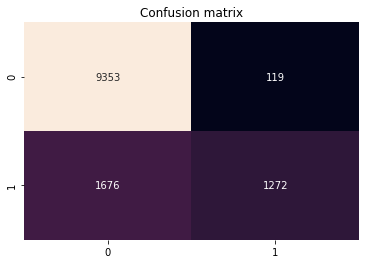

In [21]:
print("Precision: {0:6.2f}".format(precision_score(y_test['rating'], preds, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test['rating'], preds, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test['rating'], preds, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test['rating'], preds)))
print(classification_report(y_test['rating'], preds))
labels = clf1.classes_
sns.heatmap(data=confusion_matrix(y_test['rating'], preds), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

–ë–µ–∑ –ø–æ–¥–±—Ä–∞ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ —É–∂–µ —Ö–æ—Ä–æ—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –ø–æ accuracy, –Ω–æ —Ö—É–∂–µ –ø–æ F1

In [22]:
clf1.get_params().keys()

dict_keys(['memory', 'steps', 'features', 'clf', 'features__n_jobs', 'features__transformer_list', 'features__transformer_weights', 'features__text1', 'features__words_count', 'features__num_comments', 'features__bank_name', 'features__city', 'features__text1__memory', 'features__text1__steps', 'features__text1__selector', 'features__text1__cnt_vect', 'features__text1__tfidf_tr', 'features__text1__lsa', 'features__text1__selector__key', 'features__text1__cnt_vect__analyzer', 'features__text1__cnt_vect__binary', 'features__text1__cnt_vect__decode_error', 'features__text1__cnt_vect__dtype', 'features__text1__cnt_vect__encoding', 'features__text1__cnt_vect__input', 'features__text1__cnt_vect__lowercase', 'features__text1__cnt_vect__max_df', 'features__text1__cnt_vect__max_features', 'features__text1__cnt_vect__min_df', 'features__text1__cnt_vect__ngram_range', 'features__text1__cnt_vect__preprocessor', 'features__text1__cnt_vect__stop_words', 'features__text1__cnt_vect__strip_accents', 'f

In [23]:
hyperparams = {
    'features__text1__cnt_vect__ngram_range': [(1, 1), (2, 2), (3, 3)],
}

grid1 = GridSearchCV(clf1, hyperparams, cv=5, verbose=10, n_jobs=4, scoring='f1')
grid1.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  10 out of  15 | elapsed: 15.4min remaining:  7.7min
[Parallel(n_jobs=4)]: Done  12 out of  15 | elapsed: 39.5min remaining:  9.9min
[Parallel(n_jobs=4)]: Done  15 out of  15 | elapsed: 47.2min finished
c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('text1', Pipeline(memory=None,
     steps=[('selector', TextSelector(key='lemma')), ('cnt_vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input=...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid={'features__text1__cnt_vect__ngram_range': [(1, 1), (2, 2), (3, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [24]:
print(grid1.best_params_)
print(grid1.best_score_)

{'features__text1__cnt_vect__ngram_range': (1, 1)}
0.5916851463021996


c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Precision:   0.88
Recall:   0.72
F1-measure:   0.76
Accuracy:   0.86
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      9472
           1       0.92      0.45      0.60      2948

   micro avg       0.86      0.86      0.86     12420
   macro avg       0.88      0.72      0.76     12420
weighted avg       0.87      0.86      0.84     12420



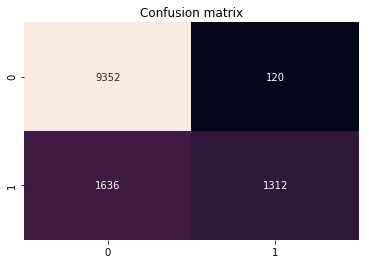

In [25]:
preds = grid1.best_estimator_.predict(X_test)
print("Precision: {0:6.2f}".format(precision_score(y_test['rating'], preds, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test['rating'], preds, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test['rating'], preds, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test['rating'], preds)))
print(classification_report(y_test['rating'], preds))
labels = clf1.classes_
sns.heatmap(data=confusion_matrix(y_test['rating'], preds), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

–ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —É–ª—É—á—à–∏—Ç—å —Ä–µ–∑—É–ª—å—Ç–∞—Ç –Ω–µ –ø–æ–ª—É—á–∏–ª–æ—Å—å.

–õ—É—á—à–µ –≤—Å–µ–≥–æ —Ä–∞–±–æ—Ç–∞—é—Ç —É–Ω–∏–≥—Ä–∞–º–º—ã.

–†–µ–∑—É–ª—å—Ç–∞—Ç –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ì–ü–°–ß.

–¢—Ä–∏–≥—Ä–∞–º–º—ã —Å—á–∏—Ç–∞—é—Ç—Å—è –Ω—É –æ—á–µ–Ω—å –¥–æ–ª–≥–æ.

In [27]:
text2 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('cnt_vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
    ('tfidf_tr', TfidfTransformer()),
    ('lsa', TruncatedSVD(n_components=100))
])
text1.fit_transform(X_train)

array([[ 0.23625725, -0.09647917, -0.0267986 , ...,  0.03114487,
        -0.01029539,  0.00553989],
       [ 0.11917959, -0.05020567,  0.02002534, ...,  0.01256701,
        -0.02976576, -0.00952686],
       [ 0.26778566,  0.01497633,  0.13963541, ..., -0.00326588,
         0.00844652,  0.0209487 ],
       ...,
       [ 0.21163135,  0.03317291, -0.0199546 , ...,  0.05219903,
        -0.04639692, -0.01433147],
       [ 0.23514567,  0.07106686, -0.00293267, ...,  0.01853452,
        -0.00621342, -0.00063945],
       [ 0.36356512, -0.0639505 , -0.15439019, ..., -0.0135146 ,
        -0.03636106, -0.01062212]])

In [28]:
features2 = FeatureUnion([
    ('text2', text2),
    ('words_count', words_count),
    ('num_comments', num_comments),
    ('bank_name', bank_name),
    ('city', city)
])

In [31]:
clf2 = Pipeline([
    ('features', features2),
    ('clf', RandomForestClassifier())
])
clf2.fit(X_train, y_train)

c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
c:\venv\nlp\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.",

Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('text2', Pipeline(memory=None,
     steps=[('selector', TextSelector(key='lemma')), ('cnt_vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input=...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [32]:
preds = clf2.predict(X_test)
np.mean(preds == y_test['rating'])

c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


0.8524154589371981

Precision:   0.88
Recall:   0.70
F1-measure:   0.74
Accuracy:   0.85
              precision    recall  f1-score   support

           0       0.85      0.99      0.91      9472
           1       0.91      0.42      0.57      2948

   micro avg       0.85      0.85      0.85     12420
   macro avg       0.88      0.70      0.74     12420
weighted avg       0.86      0.85      0.83     12420



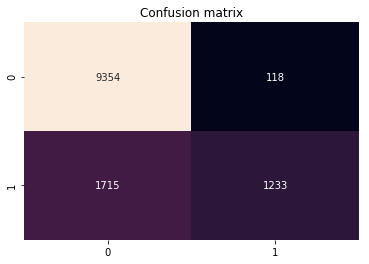

In [34]:
print("Precision: {0:6.2f}".format(precision_score(y_test['rating'], preds, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test['rating'], preds, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test['rating'], preds, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test['rating'], preds)))
print(classification_report(y_test['rating'], preds))
labels = clf2.classes_
sns.heatmap(data=confusion_matrix(y_test['rating'], preds), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

–ó–Ω–∞—á–∏—Ç–µ–ª—å–Ω—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É —É–Ω–∏–≥—Ä–∞–º–º–∞–º–∏ –∏ —Å–∏–º–≤–æ–ª—å–Ω—ã–º –ø–æ—Ö–æ–¥–æ–º –Ω–µ—Ç

In [22]:
text3 = Pipeline([
    ('selector', TextSelector(key='lemma')),
    ('cnt_vect', CountVectorizer(analyzer = 'char', ngram_range={4,6})),
    ('tfidf_tr', TfidfTransformer()),
    ('lda', LatentDirichletAllocation(n_components=20, n_jobs=4, verbose=10))
])

In [23]:
features3 = FeatureUnion([
    ('text3', text3),
    ('words_count', words_count),
    ('num_comments', num_comments),
    ('bank_name', bank_name),
    ('city', city)
])

In [24]:
clf3 = Pipeline([
    ('features', features3),
    ('clf', RandomForestClassifier(n_jobs=4, verbose=10))
])
clf3.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  6.0min remaining:  6.0min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  6.1min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  6.1min finished


iteration: 1 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  4.3min remaining:  4.3min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  4.4min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  4.4min finished


iteration: 2 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  2.5min remaining:  2.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  2.5min finished


iteration: 3 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.8min remaining:  1.8min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.8min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.8min finished


iteration: 4 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.6min remaining:  1.6min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.6min finished


iteration: 5 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.6min finished


iteration: 6 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min finished


iteration: 7 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min finished


iteration: 8 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min finished


iteration: 9 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  1.5min remaining:  1.5min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  1.5min finished


iteration: 10 of max_iter: 10


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   36.2s remaining:   36.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   36.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   36.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   34.6s remaining:   34.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   35.4s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   35.4s finished
c:\venv\nlp\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\venv\nlp\lib\site-packages\sklearn\base.py:467: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).tran

building tree 1 of 10building tree 2 of 10building tree 3 of 10building tree 4 of 10



building tree 5 of 10
building tree 6 of 10
building tree 7 of 10building tree 8 of 10

building tree 9 of 10

[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    1.9s remaining:    1.9s



building tree 10 of 10

[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    1.9s remaining:    0.8s


[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.7s finished


Pipeline(memory=None,
     steps=[('features', FeatureUnion(n_jobs=None,
       transformer_list=[('text3', Pipeline(memory=None,
     steps=[('selector', TextSelector(key='lemma')), ('cnt_vect', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input=..._jobs=4,
            oob_score=False, random_state=None, verbose=10,
            warm_start=False))])

In [25]:
preds = clf3.predict(X_test)
np.mean(preds == y_test['rating'])

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   12.2s remaining:   12.2s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   12.3s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   12.3s finished
c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
c:\venv\nlp\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


0.799597423510467

Precision:   0.76
Recall:   0.61
F1-measure:   0.63
Accuracy:   0.80
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      9472
           1       0.71      0.26      0.38      2948

   micro avg       0.80      0.80      0.80     12420
   macro avg       0.76      0.61      0.63     12420
weighted avg       0.79      0.80      0.76     12420



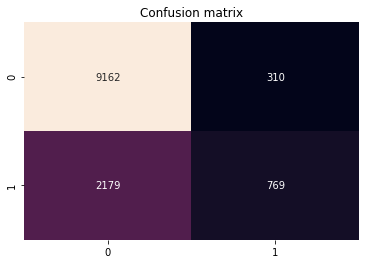

In [27]:
print("Precision: {0:6.2f}".format(precision_score(y_test['rating'], preds, average='macro')))
print("Recall: {0:6.2f}".format(recall_score(y_test['rating'], preds, average='macro')))
print("F1-measure: {0:6.2f}".format(f1_score(y_test['rating'], preds, average='macro')))
print("Accuracy: {0:6.2f}".format(accuracy_score(y_test['rating'], preds)))
print(classification_report(y_test['rating'], preds))
labels = clf3.classes_
sns.heatmap(data=confusion_matrix(y_test['rating'], preds), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

LDA –æ—Ç—Ä–∞–±–æ—Ç–∞–ª–æ —Ö—É–∂–µ, —á–µ–º SVD. –í–æ–∑–º–æ–∂–Ω–æ, —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ —Å –º–µ–Ω—å—à–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ñ–∏—á–µ–π (20 –ø—Ä–æ—Ç–∏–≤ 100). –ù—É –∏ LDA —Ä–∞–±–æ—Ç–∞–µ—Ç –º–µ–¥–ª–µ–Ω–Ω–µ–µ, —á–µ–º SVD